<a href="https://colab.research.google.com/github/sofiavasqq/Vasquez_Labs/blob/main/Vasquez_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

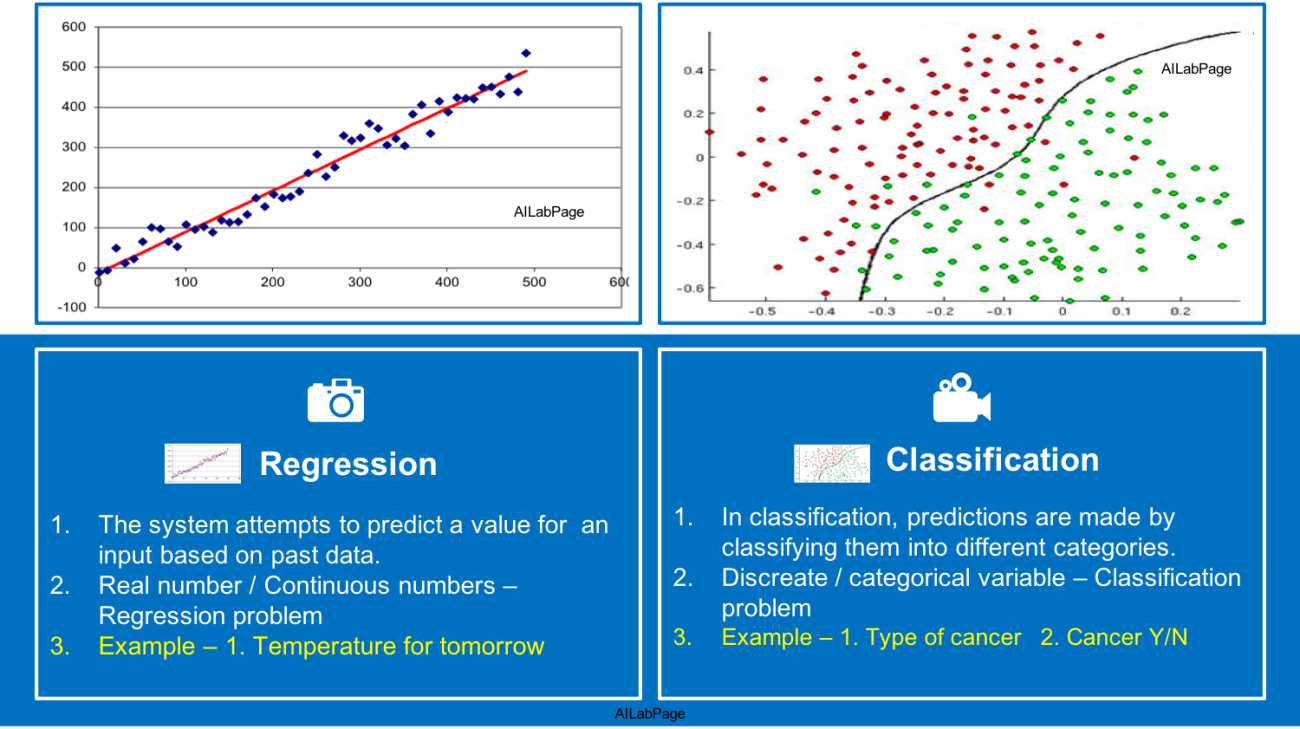

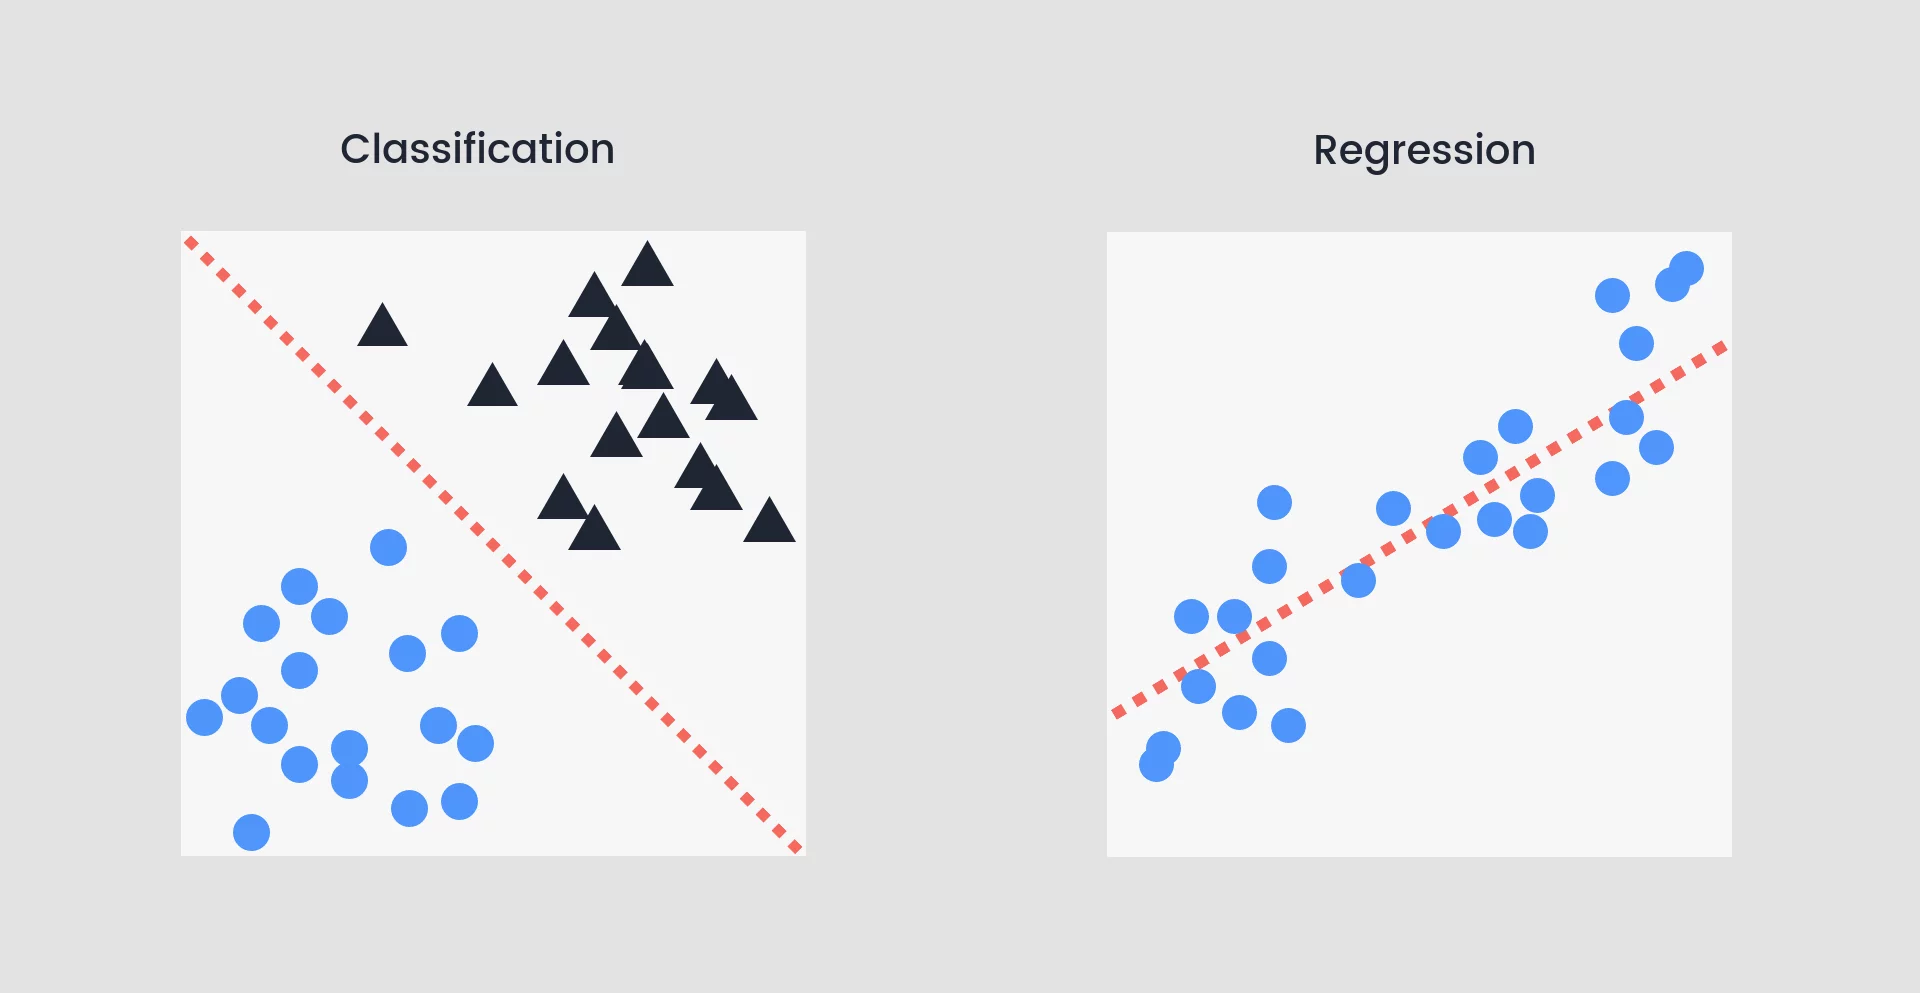

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

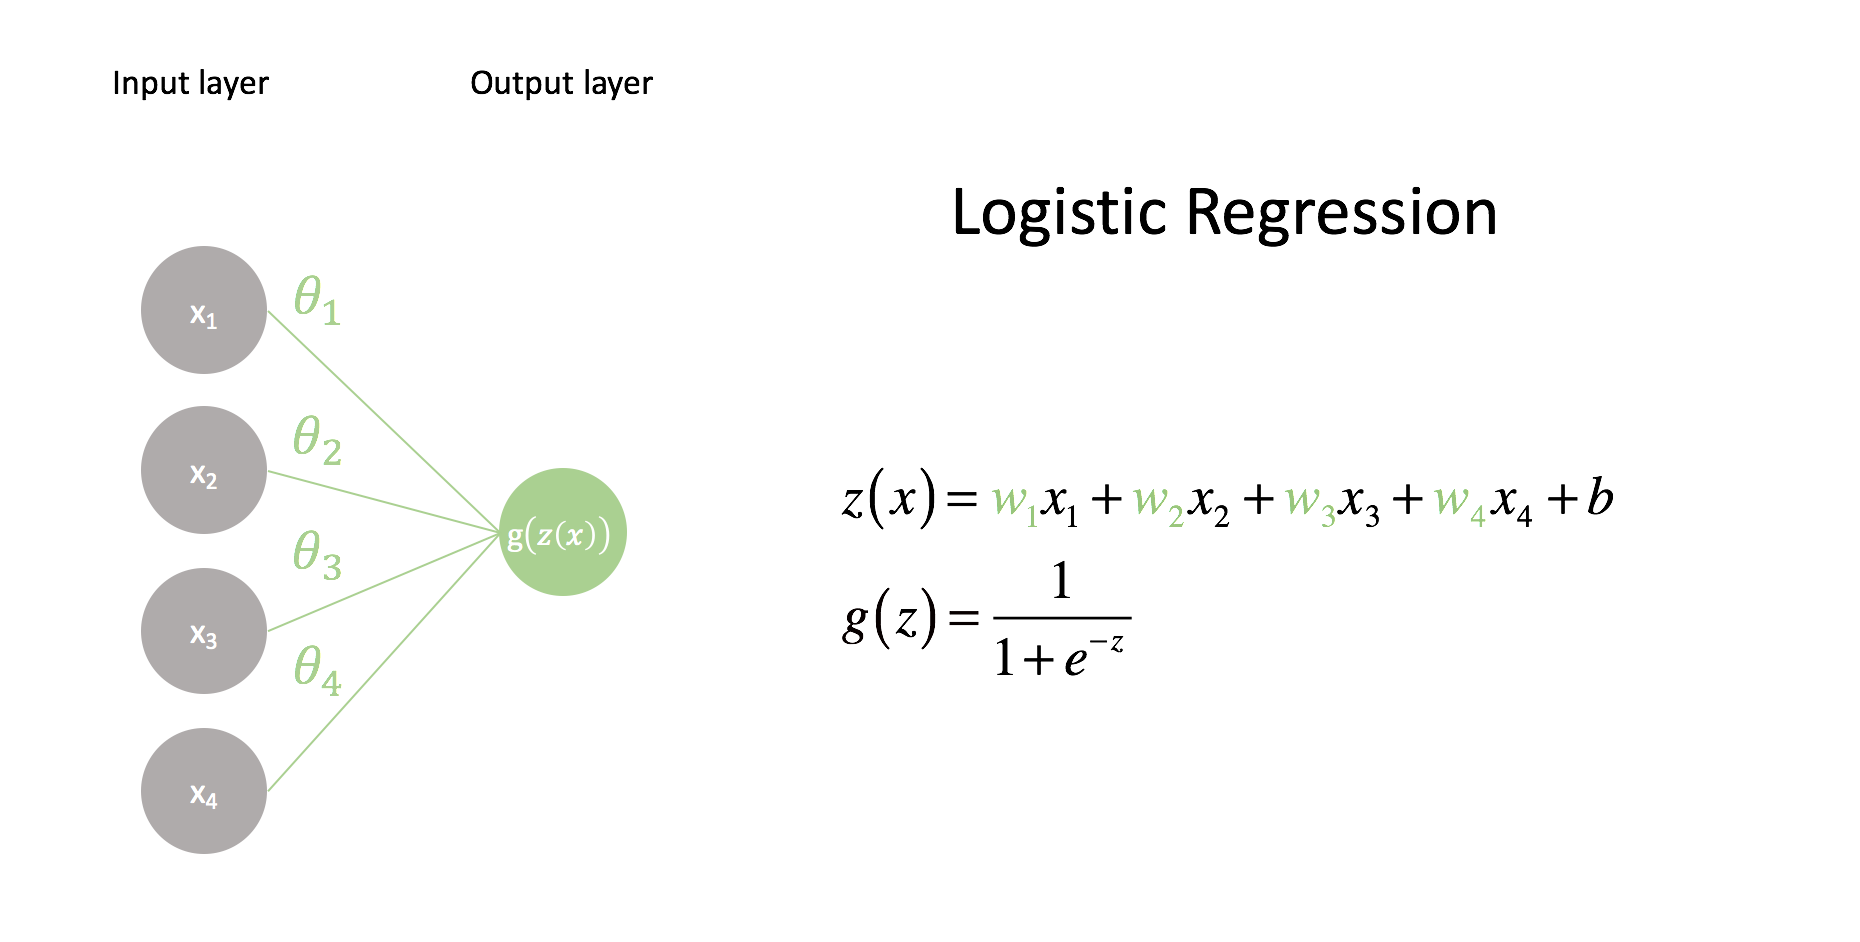

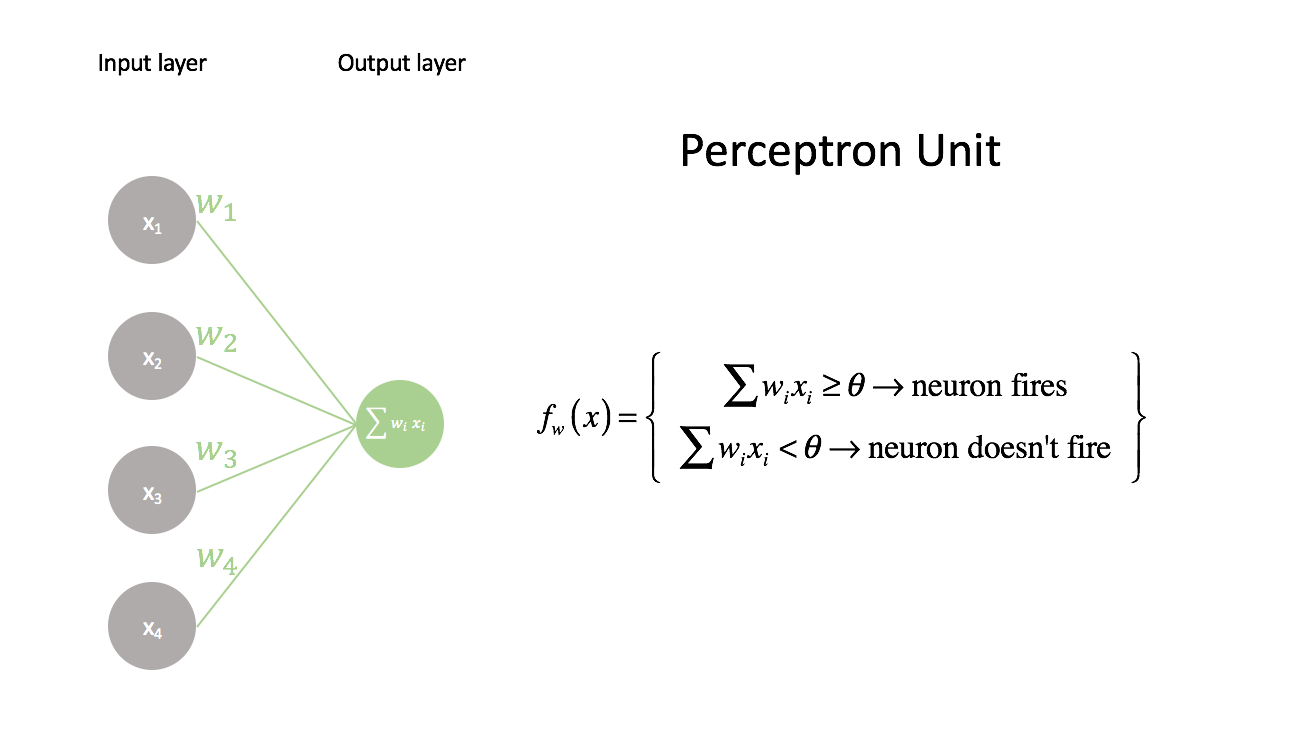

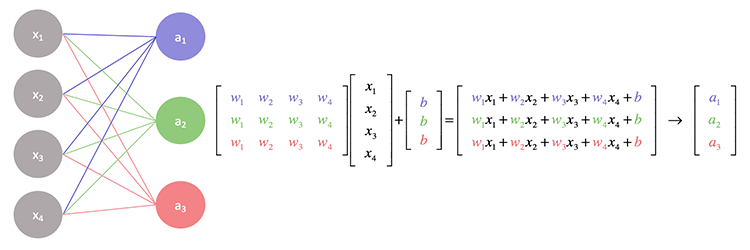

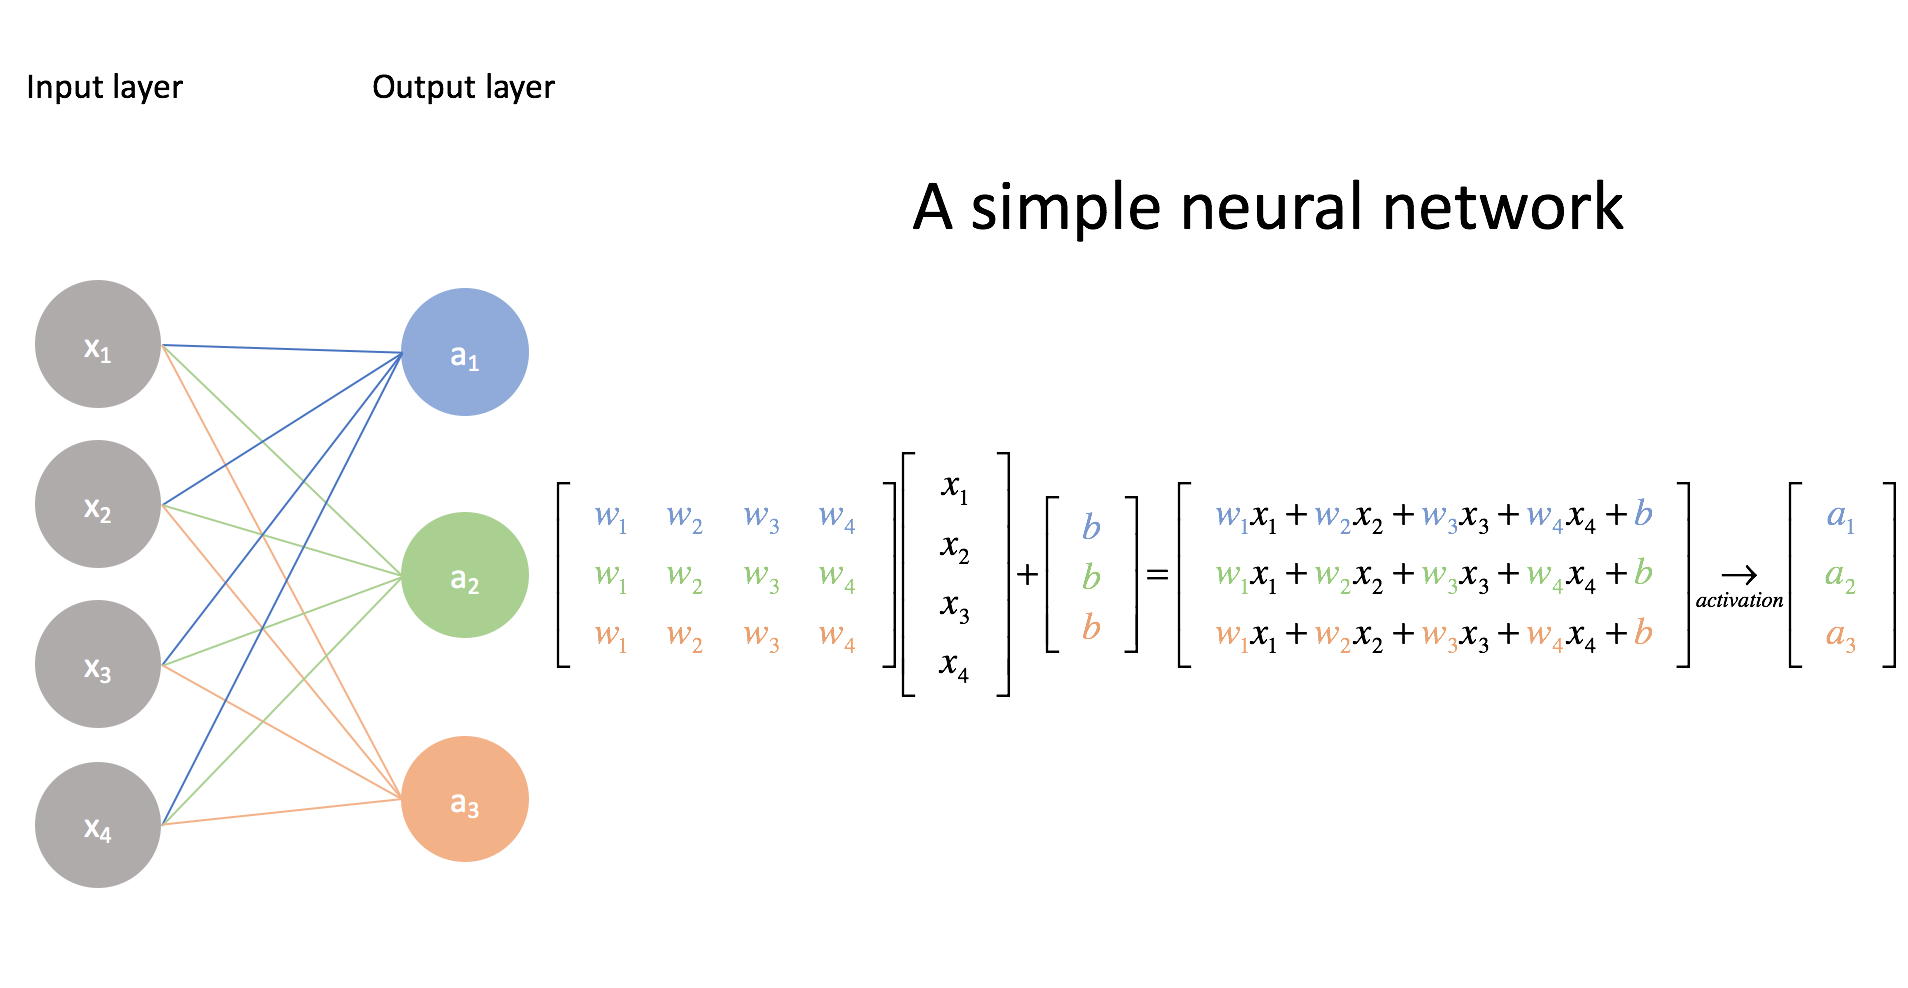

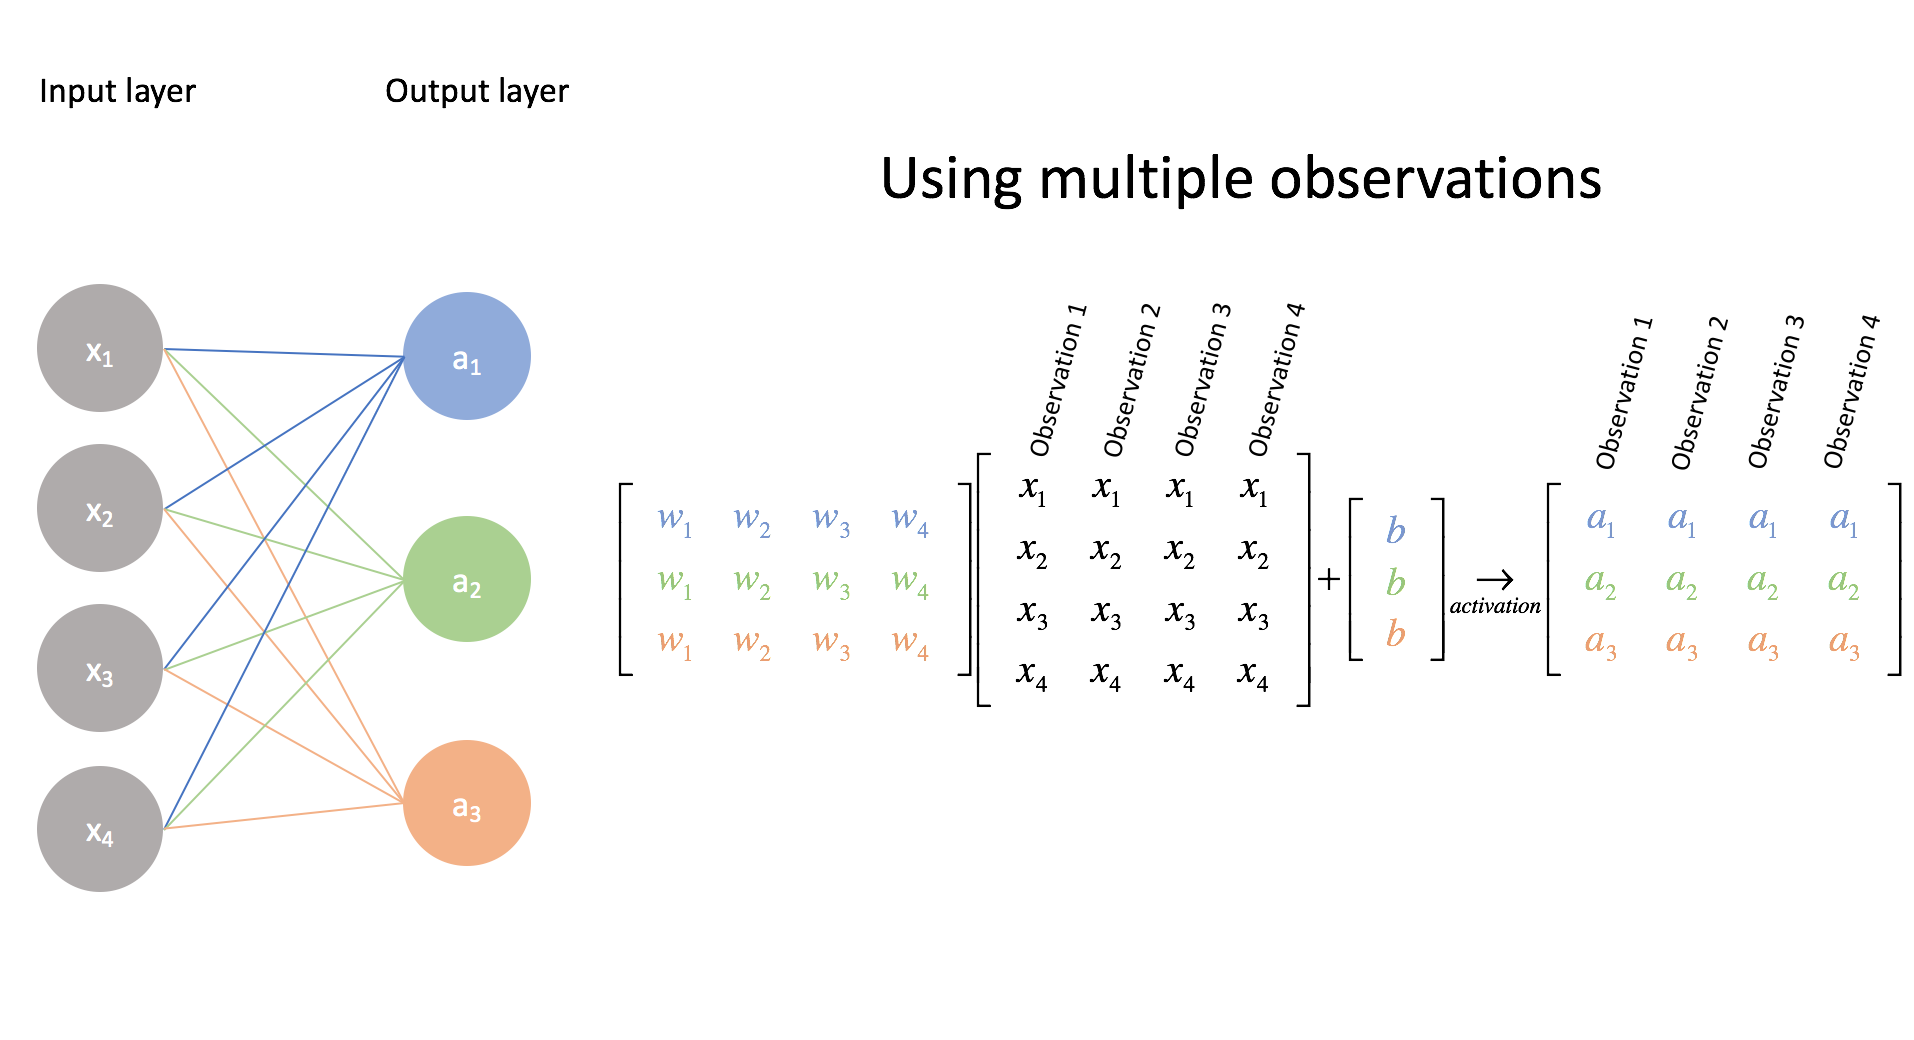

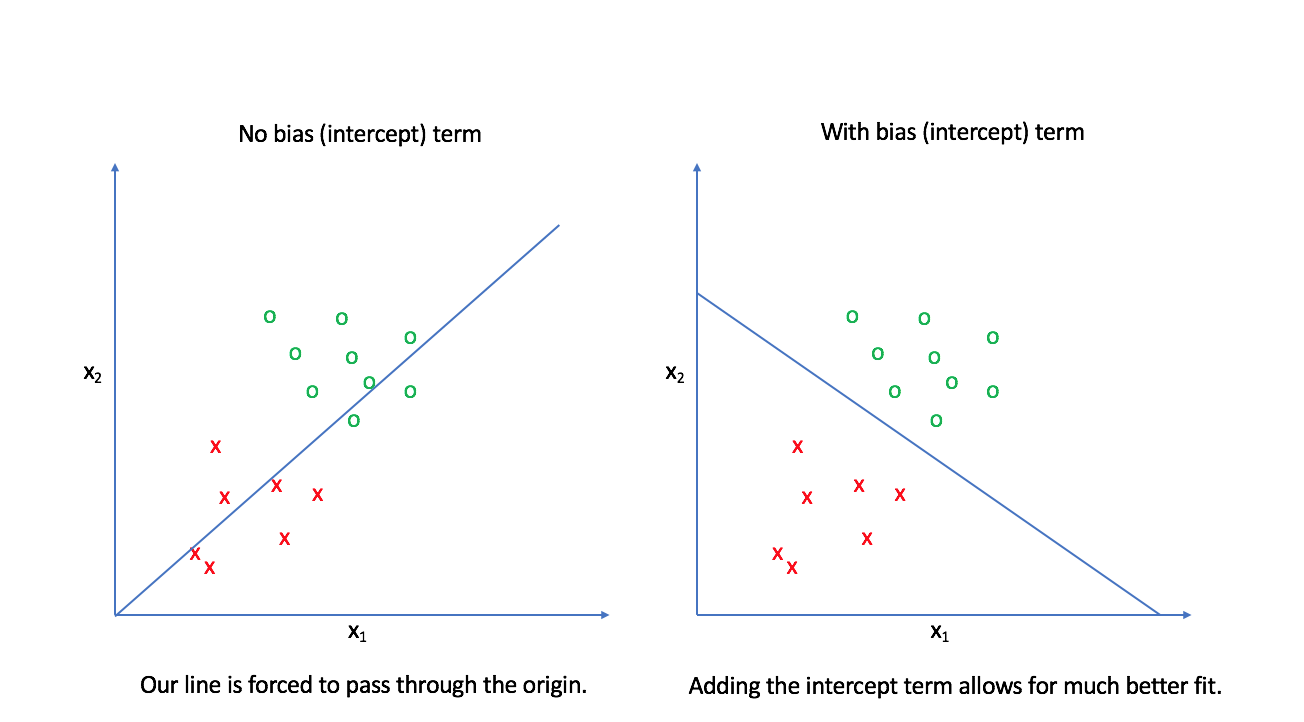

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-rhxt9tfk
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-rhxt9tfk


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [2]:
x = np.arange(0,9)

In [3]:
x.shape

(9,)

In [4]:
x = x[:,None]

In [5]:
x.shape

(9, 1)

In [6]:
y = 3*x-5

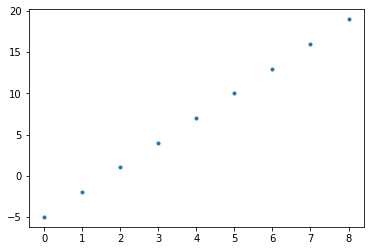

In [7]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [8]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [9]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [10]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [11]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 1767.49169921875 0.638862133026123 -1.2074851989746094
1 622.0079956054688 1.3291454315185547 -1.1057485342025757
2 237.52035522460938 1.7304680347442627 -1.0555435419082642
3 108.26959228515625 1.9644362926483154 -1.035137414932251
4 64.62673950195312 2.1014761924743652 -1.0319443941116333
5 49.69932556152344 2.1823740005493164 -1.0386756658554077
6 44.40582275390625 2.23075008392334 -1.0511103868484497
7 42.34646224975586 2.260283946990967 -1.0668044090270996
8 41.374691009521484 2.278898000717163 -1.084342360496521
9 40.77056884765625 2.291180372238159 -1.1029047966003418
10 40.292606353759766 2.299787998199463 -1.122017502784729
11 39.859779357910156 2.306259870529175 -1.1414059400558472
12 39.44487380981445 2.3114869594573975 -1.1609113216400146
13 39.03874969482422 2.315985918045044 -1.180441975593567
14 38.638309478759766 2.3200554847717285 -1.1999449729919434
15 38.24245834350586 2.323868989944458 -1.2193899154663086
16 37.8508415222168 2.327526569366455 -1.2387595176696777
1

In [12]:
loss.item()

0.0015301841776818037

In [13]:
m.item()

2.9957258701324463

In [14]:
b.item()

-4.976085186004639

# Pytorch Linear Model

In [15]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [16]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [17]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [18]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [19]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 113.12449645996094
2 1000 37.85013198852539
3 1000 16.450275421142578
4 1000 10.320109367370605
5 1000 8.51837158203125
6 1000 7.944118976593018
7 1000 7.718476295471191
8 1000 7.592353820800781
9 1000 7.495141983032227
10 1000 7.406822204589844
11 1000 7.321714401245117
12 1000 7.2382025718688965
13 1000 7.155816078186035
14 1000 7.074416637420654
15 1000 6.993956089019775
16 1000 6.91441535949707
17 1000 6.835783004760742
18 1000 6.7580413818359375
19 1000 6.681185722351074
20 1000 6.6052045822143555
21 1000 6.530086517333984
22 1000 6.455822944641113
23 1000 6.382403373718262
24 1000 6.309820652008057
25 1000 6.238062381744385
26 1000 6.167119979858398
27 1000 6.096985340118408
28 1000 6.027646541595459
29 1000 5.959097385406494
30 1000 5.891327857971191
31 1000 5.824328899383545
32 1000 5.758091926574707
33 1000 5.692607879638672
34 1000 5.627867698669434
35 1000 5.563865661621094
36 1000 5.500589847564697
37 1000 5.438035011291504
38 1000 5.376191139221191
39 1000 5.3150510

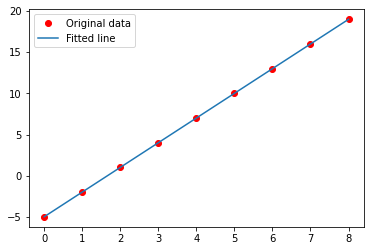

In [20]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [21]:
model

Linear(in_features=1, out_features=1, bias=True)

In [22]:
model.weight

Parameter containing:
tensor([[2.9969]], requires_grad=True)

In [23]:
model.bias

Parameter containing:
tensor([-4.9827], requires_grad=True)

In [24]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [25]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [26]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [27]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [28]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [105]:
# #MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#est_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [30]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255 #converts into numpy for us

In [31]:
X.shape #tells us how many examples we have, 28*28 pixels

(60000, 1, 28, 28)

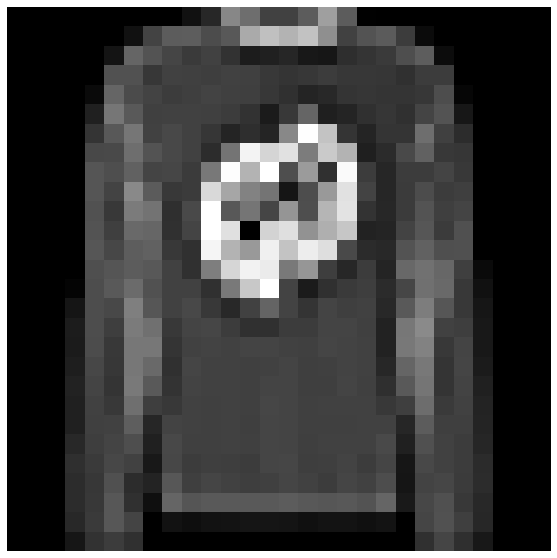

In [32]:
plot(X[123,0,0:28,0:28]) #whatever number is put first is the number of the image in the data set, : is the wildcard for the rows of pixels

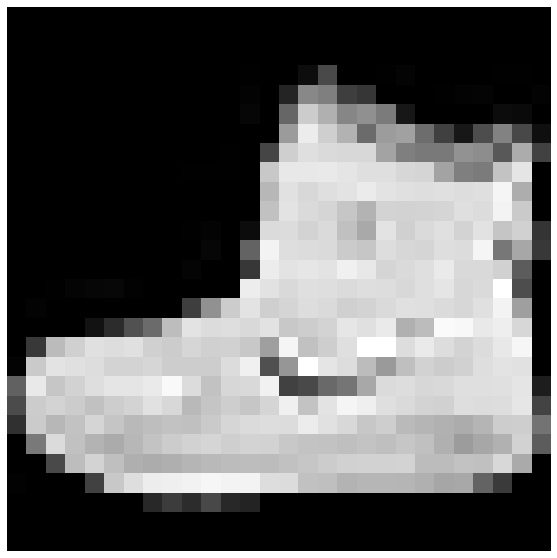

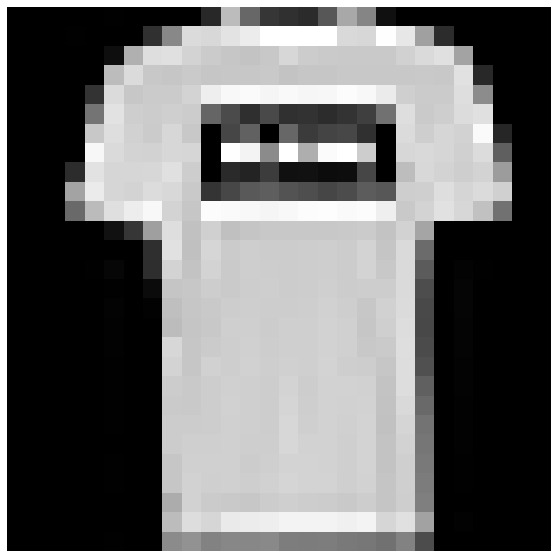

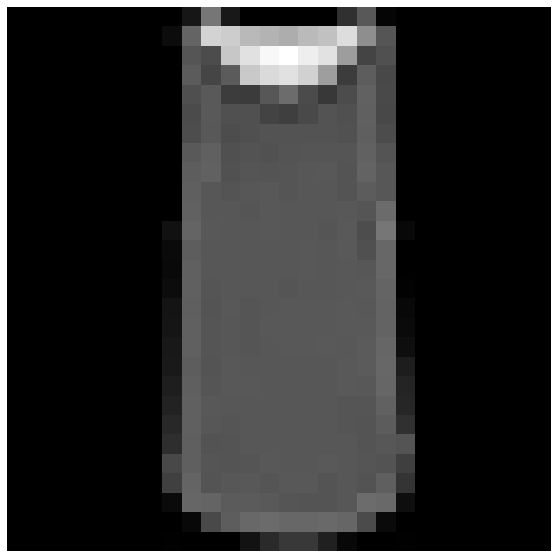

In [33]:
for i in range(3):
    plot(X[i,0,:,:]) #tells the system to show us the first 3 numbers of our dataset
    

In [34]:
Y

array([9, 0, 0, ..., 3, 0, 5])

In [35]:
X[0:25,0,:,:].shape #0 takes out the color channel

(25, 28, 28)

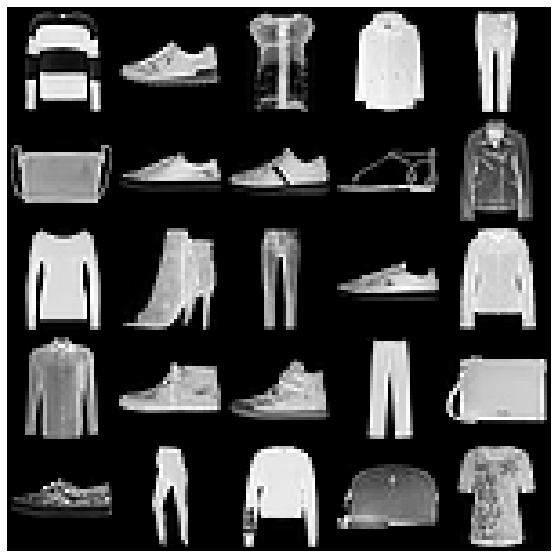

In [36]:
montage_plot(X[125:150,0,:,:]) #shows us a bunch our data at once

In [37]:
X.shape[0]

60000

In [38]:
X_test.shape

(10000, 1, 28, 28)

In [39]:
X.shape[0]

60000

In [40]:
X_test.shape[0]

10000

In [41]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [42]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

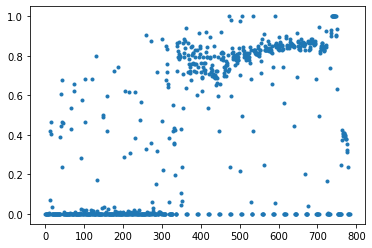

In [43]:
plt.plot(X[100],'.')

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

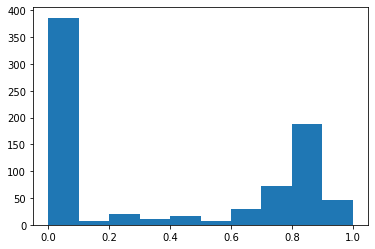

In [44]:
plt.hist(X[0])

In [45]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [46]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (3).data'

In [47]:
W = torch.load("W.data")

In [48]:
W.shape

torch.Size([784, 10])

In [49]:
X.shape

torch.Size([60000, 784])

In [50]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

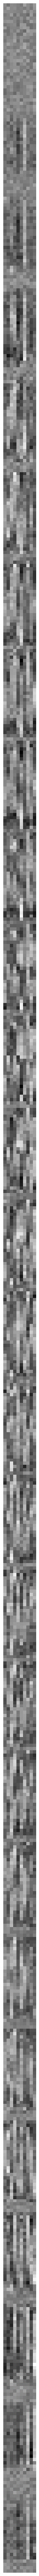

In [51]:
plot(W[0:784,:10])

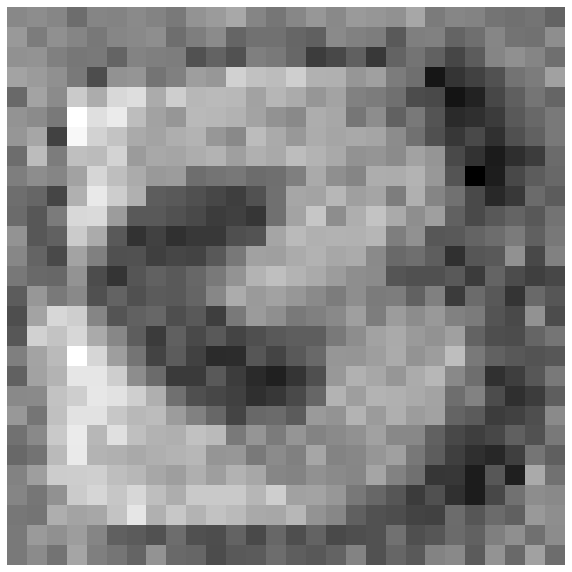

In [52]:
plot(W[:,3].reshape(28,28))

In [53]:
X.shape

torch.Size([60000, 784])

In [54]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [55]:
x,y = get_batch('train') #gives us some of the data

In [56]:
x.shape

torch.Size([1000, 784])

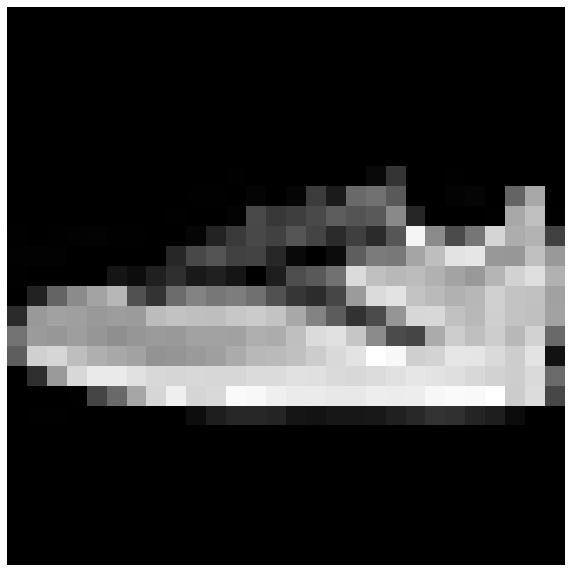

In [57]:
plot(x[0].reshape(28,28))

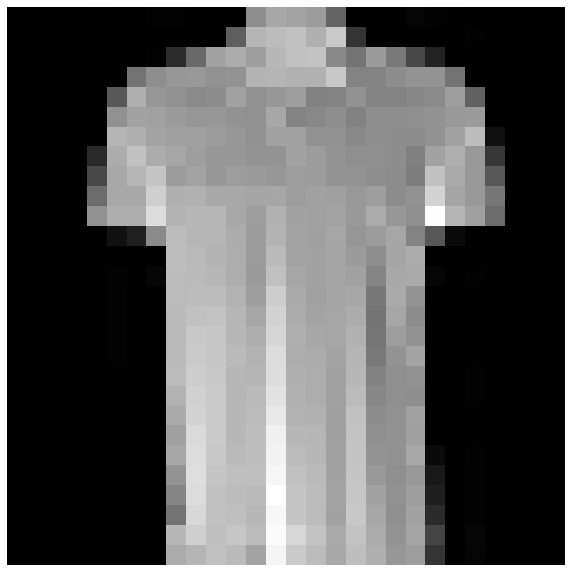

In [58]:
plot(x[1].reshape(28,28))

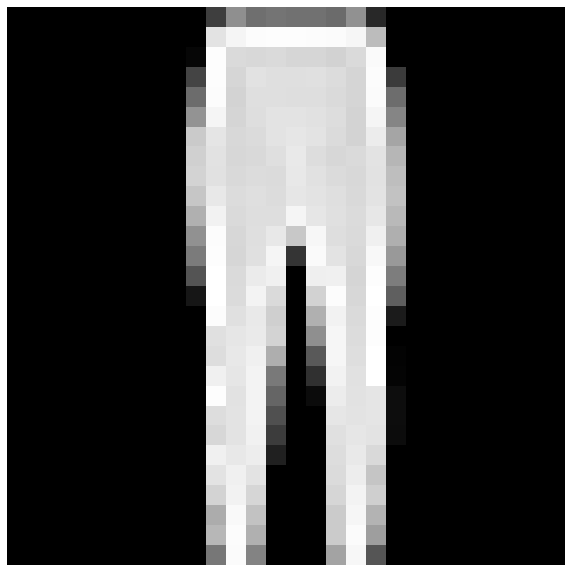

In [59]:
plot(x[2].reshape(28,28))

In [60]:
y #list of all the answers

tensor([7., 0., 1., 3., 0., 2., 5., 9., 0., 3., 7., 3., 8., 6., 3., 8., 6., 9.,
        2., 6., 3., 3., 2., 2., 1., 0., 8., 2., 8., 1., 2., 1., 1., 9., 5., 2.,
        4., 7., 6., 3., 1., 2., 8., 9., 4., 8., 1., 9., 5., 2., 8., 1., 7., 8.,
        6., 4., 8., 9., 8., 4., 8., 2., 0., 8., 2., 9., 0., 2., 9., 1., 8., 4.,
        7., 6., 8., 6., 2., 6., 1., 4., 7., 6., 8., 7., 8., 3., 2., 9., 3., 4.,
        8., 2., 9., 2., 3., 7., 2., 2., 2., 9., 1., 0., 4., 7., 1., 5., 7., 1.,
        0., 0., 5., 0., 4., 7., 2., 1., 6., 0., 4., 6., 9., 2., 1., 9., 2., 0.,
        0., 3., 4., 6., 3., 1., 5., 9., 0., 8., 6., 6., 2., 6., 0., 6., 9., 5.,
        0., 4., 3., 4., 8., 7., 5., 3., 9., 7., 4., 3., 6., 4., 7., 3., 2., 3.,
        1., 6., 6., 6., 5., 6., 3., 7., 3., 8., 8., 2., 3., 5., 6., 0., 0., 9.,
        0., 9., 2., 4., 0., 4., 3., 6., 1., 7., 7., 6., 0., 8., 9., 8., 2., 7.,
        7., 1., 3., 8., 5., 9., 9., 0., 0., 2., 2., 9., 7., 0., 4., 7., 8., 3.,
        0., 5., 6., 3., 9., 9., 6., 0., 

In [61]:
x.shape, W.shape #x is our data which is 1000 images as a list of numbers, the 784 tells us our inputs; if the inside numbers match we can run matmul

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [62]:
torch.matmul(x,W).shape #the inside dimenstions cancel out

torch.Size([1000, 10])

In [63]:
(x@W).shape

torch.Size([1000, 10])

In [64]:
%%timeit
x@W #the @ is a shortcut that does the same thing as matrix multiple(matmul)

29.5 µs ± 9.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [65]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [66]:
x@W

tensor([[ -7.0490, -18.6943,   9.7203,  ..., -14.3891, -14.8250, -16.2839],
        [-16.7801, -29.0319,  -9.8450,  ...,  -3.7736,  -9.6938, -12.7273],
        [-11.3656, -16.4765,  -0.8647,  ...,  -5.0322,  -5.7187,  -2.8072],
        ...,
        [ -5.6659, -25.5726,   7.9520,  ..., -13.3533, -20.9261, -18.9724],
        [-15.4526, -35.5618, -17.8445,  ...,  -4.1358, -19.8130,  -1.1841],
        [ -5.2647, -26.4522,  -1.3056,  ..., -17.4019, -15.2503, -16.7067]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [67]:
y2 = x@W #uses more numbers

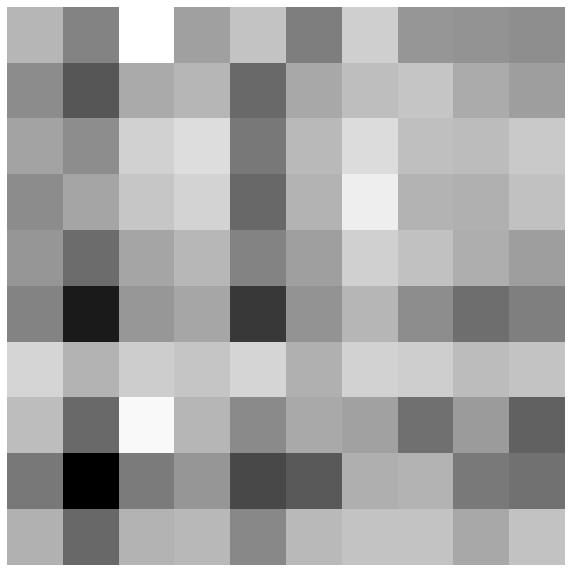

In [68]:
plot(y2[0:10,:]) 

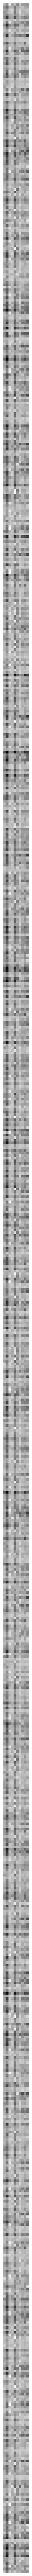

In [69]:
plot(y2) #

In [70]:
y

tensor([7., 0., 1., 3., 0., 2., 5., 9., 0., 3., 7., 3., 8., 6., 3., 8., 6., 9.,
        2., 6., 3., 3., 2., 2., 1., 0., 8., 2., 8., 1., 2., 1., 1., 9., 5., 2.,
        4., 7., 6., 3., 1., 2., 8., 9., 4., 8., 1., 9., 5., 2., 8., 1., 7., 8.,
        6., 4., 8., 9., 8., 4., 8., 2., 0., 8., 2., 9., 0., 2., 9., 1., 8., 4.,
        7., 6., 8., 6., 2., 6., 1., 4., 7., 6., 8., 7., 8., 3., 2., 9., 3., 4.,
        8., 2., 9., 2., 3., 7., 2., 2., 2., 9., 1., 0., 4., 7., 1., 5., 7., 1.,
        0., 0., 5., 0., 4., 7., 2., 1., 6., 0., 4., 6., 9., 2., 1., 9., 2., 0.,
        0., 3., 4., 6., 3., 1., 5., 9., 0., 8., 6., 6., 2., 6., 0., 6., 9., 5.,
        0., 4., 3., 4., 8., 7., 5., 3., 9., 7., 4., 3., 6., 4., 7., 3., 2., 3.,
        1., 6., 6., 6., 5., 6., 3., 7., 3., 8., 8., 2., 3., 5., 6., 0., 0., 9.,
        0., 9., 2., 4., 0., 4., 3., 6., 1., 7., 7., 6., 0., 8., 9., 8., 2., 7.,
        7., 1., 3., 8., 5., 9., 9., 0., 0., 2., 2., 9., 7., 0., 4., 7., 8., 3.,
        0., 5., 6., 3., 9., 9., 6., 0., 

In [71]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


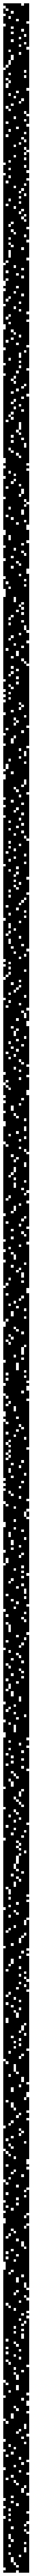

In [72]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


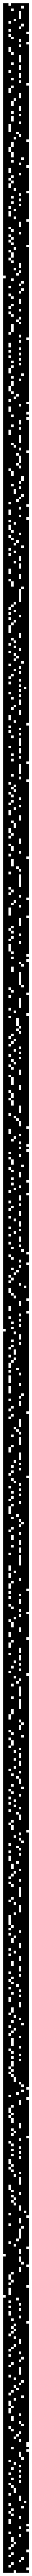

In [73]:
plot(one_hot(torch.argmax(y2,1))) #fills in one at a time

In [74]:
y

tensor([7., 0., 1., 3., 0., 2., 5., 9., 0., 3., 7., 3., 8., 6., 3., 8., 6., 9.,
        2., 6., 3., 3., 2., 2., 1., 0., 8., 2., 8., 1., 2., 1., 1., 9., 5., 2.,
        4., 7., 6., 3., 1., 2., 8., 9., 4., 8., 1., 9., 5., 2., 8., 1., 7., 8.,
        6., 4., 8., 9., 8., 4., 8., 2., 0., 8., 2., 9., 0., 2., 9., 1., 8., 4.,
        7., 6., 8., 6., 2., 6., 1., 4., 7., 6., 8., 7., 8., 3., 2., 9., 3., 4.,
        8., 2., 9., 2., 3., 7., 2., 2., 2., 9., 1., 0., 4., 7., 1., 5., 7., 1.,
        0., 0., 5., 0., 4., 7., 2., 1., 6., 0., 4., 6., 9., 2., 1., 9., 2., 0.,
        0., 3., 4., 6., 3., 1., 5., 9., 0., 8., 6., 6., 2., 6., 0., 6., 9., 5.,
        0., 4., 3., 4., 8., 7., 5., 3., 9., 7., 4., 3., 6., 4., 7., 3., 2., 3.,
        1., 6., 6., 6., 5., 6., 3., 7., 3., 8., 8., 2., 3., 5., 6., 0., 0., 9.,
        0., 9., 2., 4., 0., 4., 3., 6., 1., 7., 7., 6., 0., 8., 9., 8., 2., 7.,
        7., 1., 3., 8., 5., 9., 9., 0., 0., 2., 2., 9., 7., 0., 4., 7., 8., 3.,
        0., 5., 6., 3., 9., 9., 6., 0., 

In [75]:
torch.argmax(y2,1)

tensor([2, 7, 3, 6, 6, 6, 4, 2, 7, 6, 2, 9, 2, 3, 6, 9, 6, 2, 2, 3, 6, 6, 6, 3,
        6, 6, 2, 6, 6, 3, 6, 9, 3, 2, 2, 6, 6, 4, 3, 3, 6, 6, 3, 6, 3, 3, 6, 2,
        2, 2, 5, 6, 4, 9, 3, 3, 2, 2, 3, 3, 7, 3, 6, 9, 2, 2, 6, 3, 2, 3, 2, 2,
        4, 9, 6, 3, 6, 3, 6, 2, 4, 2, 2, 4, 9, 6, 6, 2, 3, 6, 2, 3, 2, 3, 9, 4,
        2, 3, 3, 2, 3, 6, 6, 4, 6, 5, 0, 3, 7, 6, 2, 7, 6, 2, 3, 6, 6, 3, 2, 6,
        2, 3, 6, 5, 6, 3, 3, 3, 2, 6, 9, 6, 2, 2, 6, 2, 6, 2, 6, 3, 6, 3, 2, 2,
        7, 3, 6, 3, 3, 2, 2, 3, 5, 4, 2, 9, 6, 2, 2, 9, 3, 9, 6, 6, 3, 6, 2, 2,
        6, 6, 6, 3, 4, 6, 9, 5, 6, 6, 6, 5, 6, 2, 3, 3, 7, 7, 6, 3, 6, 4, 4, 7,
        6, 5, 2, 9, 6, 2, 2, 6, 9, 2, 4, 2, 2, 3, 6, 2, 3, 5, 4, 7, 2, 4, 2, 6,
        6, 4, 6, 6, 2, 2, 6, 6, 2, 3, 3, 7, 6, 6, 6, 6, 6, 4, 3, 2, 4, 2, 6, 2,
        4, 3, 2, 2, 2, 6, 6, 3, 4, 2, 4, 6, 2, 4, 5, 4, 7, 2, 6, 4, 6, 3, 2, 6,
        2, 6, 8, 6, 2, 6, 3, 6, 6, 4, 3, 6, 6, 2, 2, 4, 9, 2, 6, 2, 6, 3, 6, 6,
        6, 2, 6, 6, 3, 6, 3, 9, 6, 6, 6,

In [76]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0810, device='cuda:0')

In [77]:
X.shape

torch.Size([60000, 784])

In [78]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [79]:
torch.argmax(X@W,1)

tensor([2, 6, 6,  ..., 6, 6, 2], device='cuda:0')

In [80]:
Y

tensor([9., 0., 0.,  ..., 3., 0., 5.], device='cuda:0')

In [81]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0777, device='cuda:0')

In [82]:
X@W

tensor([[ -9.1355, -26.5981,   5.1709,  ..., -29.5724, -15.9528, -30.1074],
        [-28.9095, -42.6421, -18.8967,  ..., -11.8924, -18.0746, -21.6941],
        [ -7.1658, -10.6776,  -1.3747,  ...,  -4.1579,  -5.6479,  -3.0956],
        ...,
        [-13.8366, -21.5116,  -3.3438,  ...,  -2.4351,  -7.5723,  -4.4591],
        [ -7.7420, -15.5898,  -9.8953,  ...,  -2.0989,  -6.3501,  -7.9436],
        [ -1.9665,  -8.2239,   4.0209,  ...,  -5.0965,  -8.9947,  -6.2918]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [83]:
W.shape

torch.Size([784, 10])

In [84]:
W[:,0].shape

torch.Size([784])

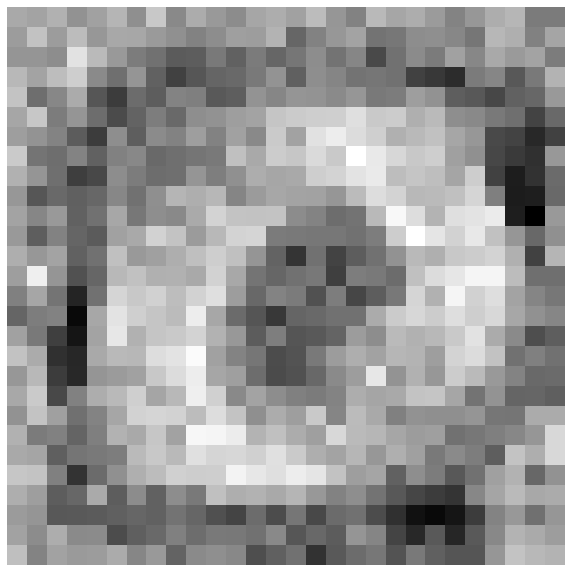

In [85]:
plot(W[:,0].reshape(28,28))

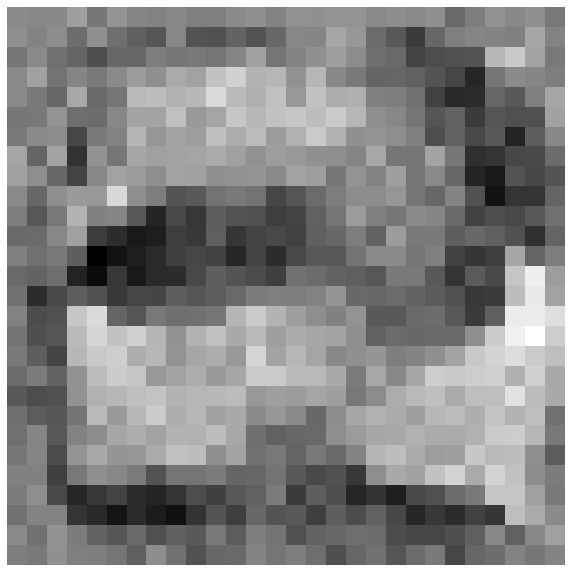

In [86]:
plot(W[:,2].reshape(28,28))

In [87]:
W.shape

torch.Size([784, 10])

In [88]:
(W.T).shape

torch.Size([10, 784])

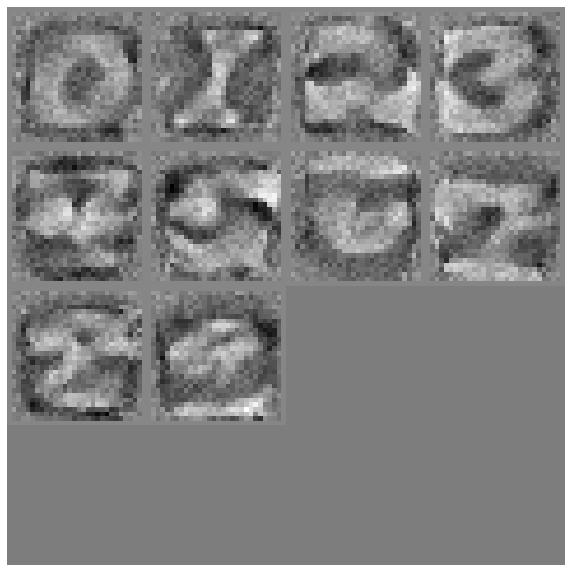

In [89]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [90]:
###################################################

In [91]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [92]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [93]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [94]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [95]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [96]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [97]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [98]:
def acc(out,y): #measures where in the output could you get the maxinmum output
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [99]:
X.shape

torch.Size([60000, 784])

In [100]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [101]:
def model(x,w):

    return x@w[0]

In [102]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


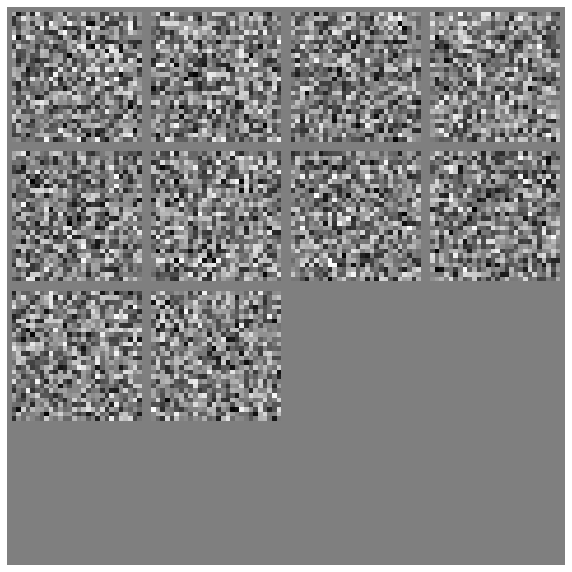

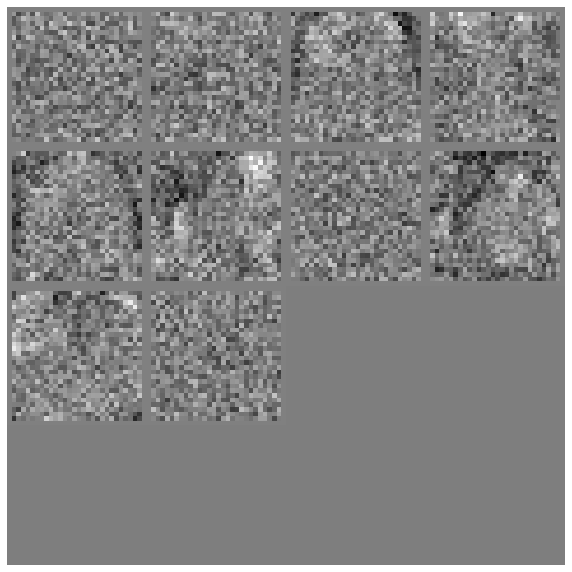

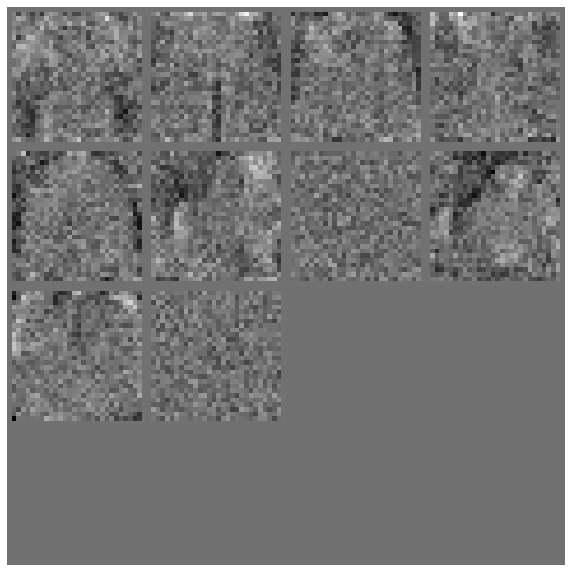

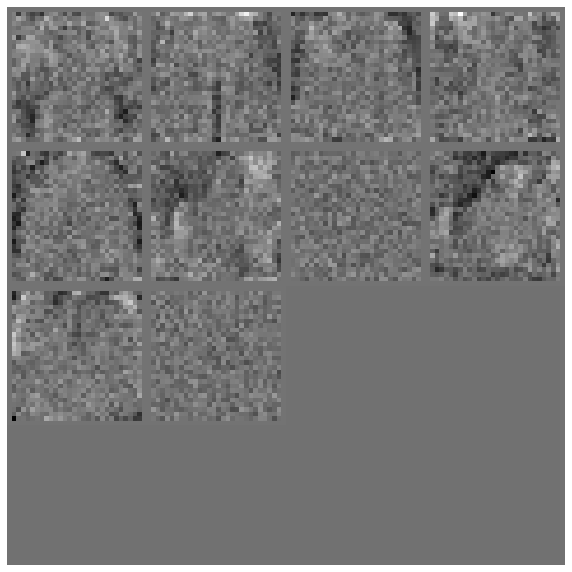

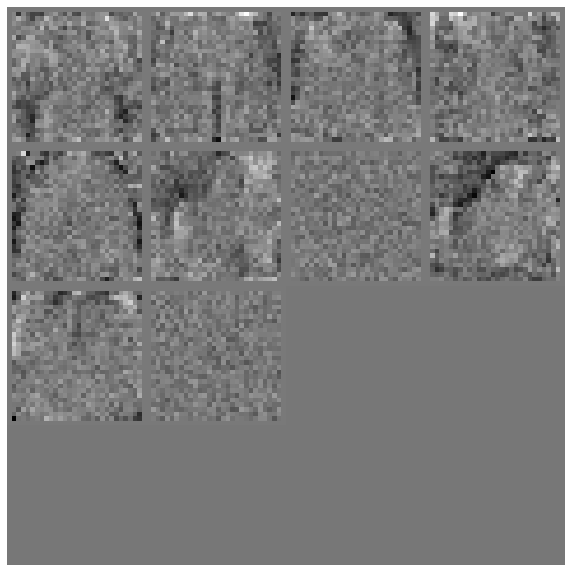

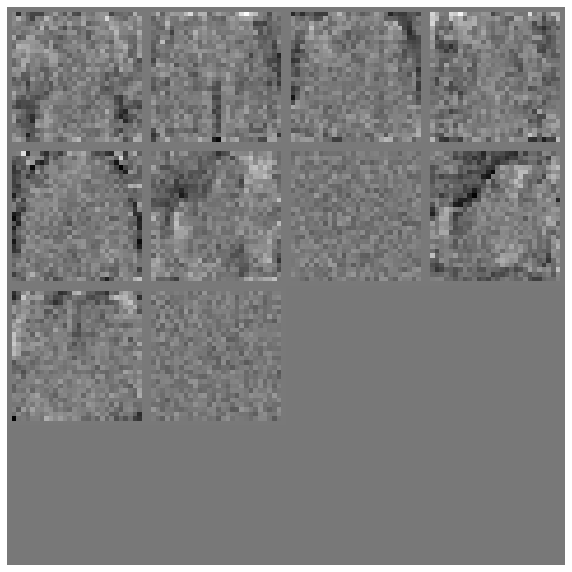

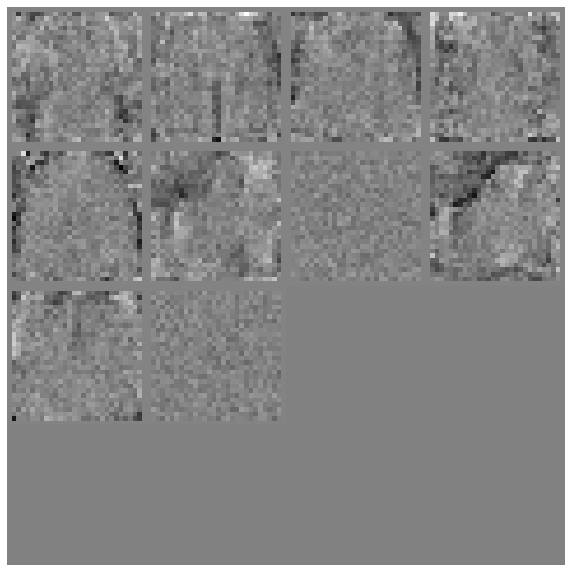

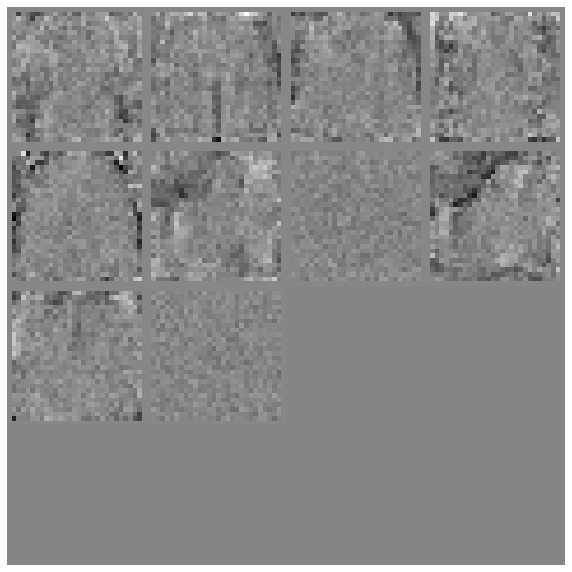

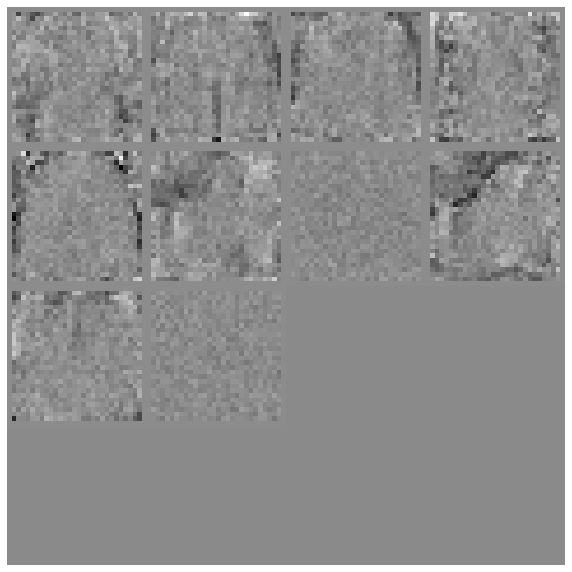

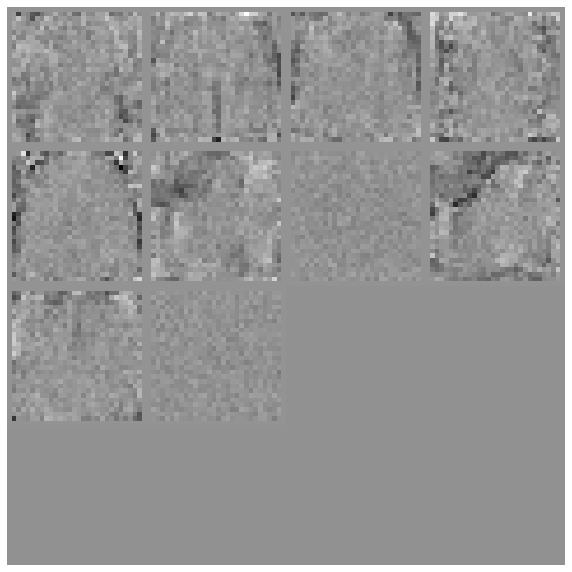

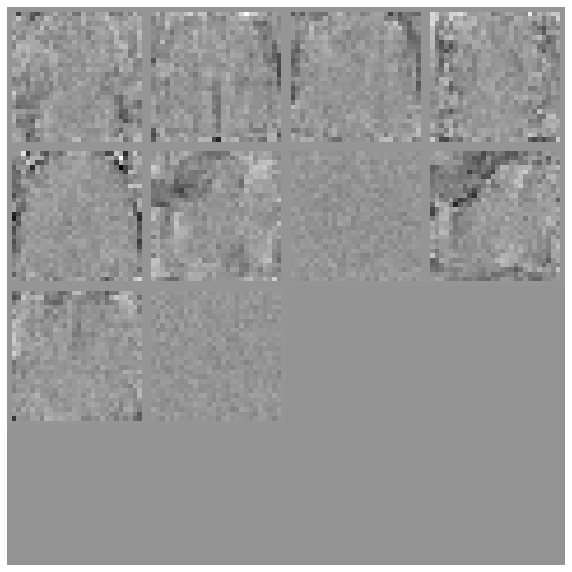

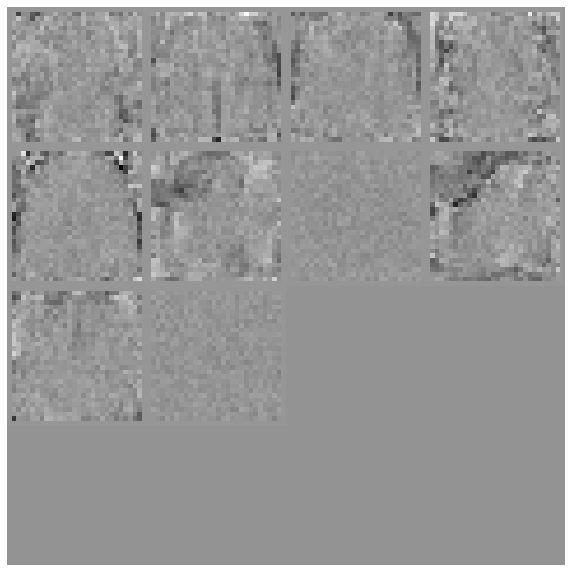

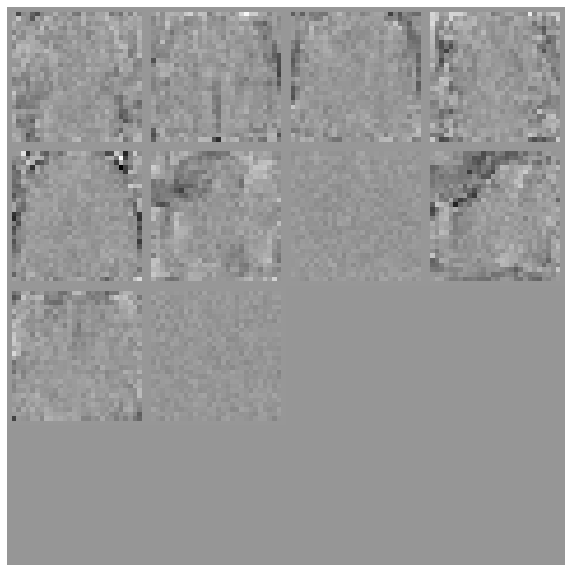

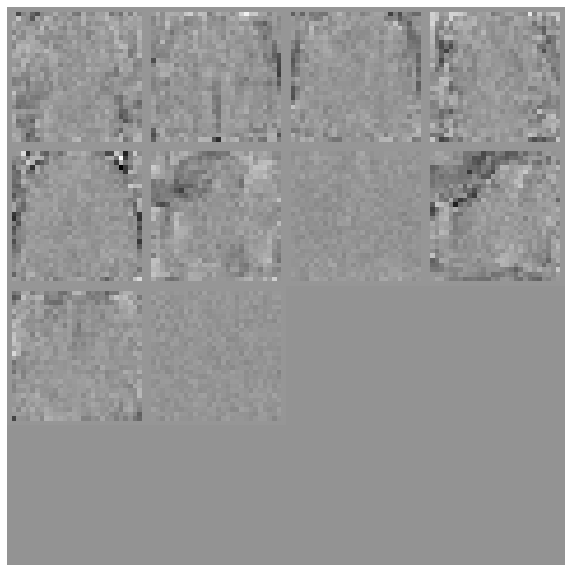

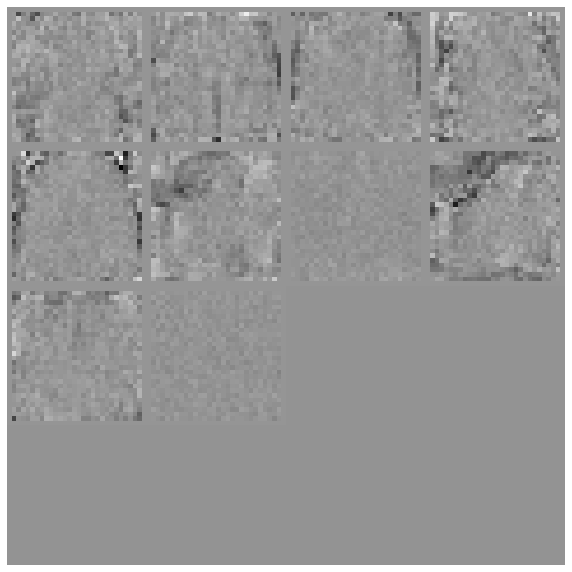

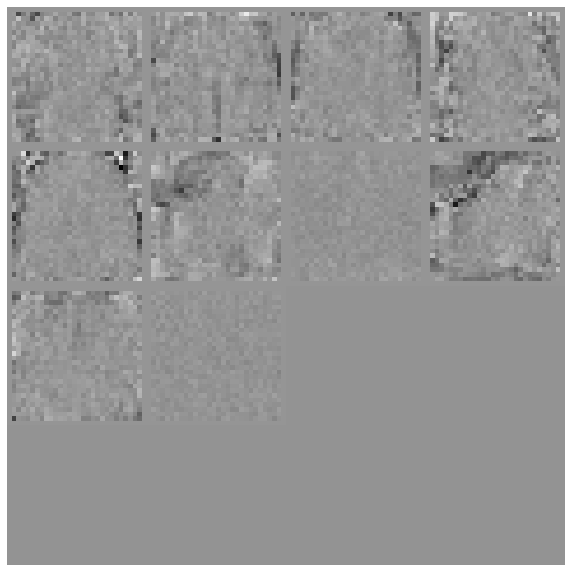

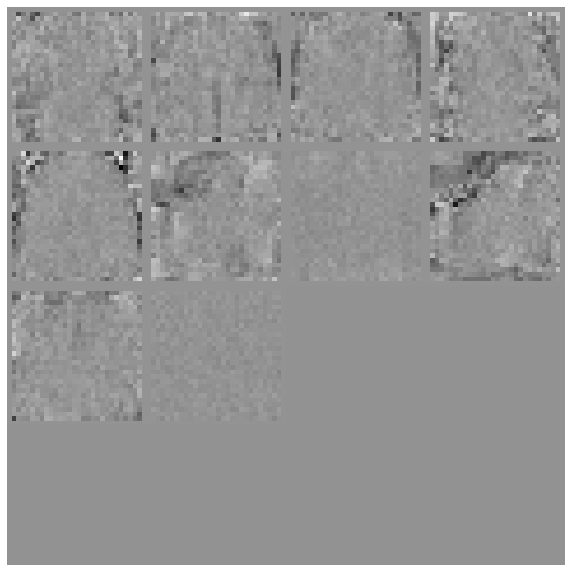

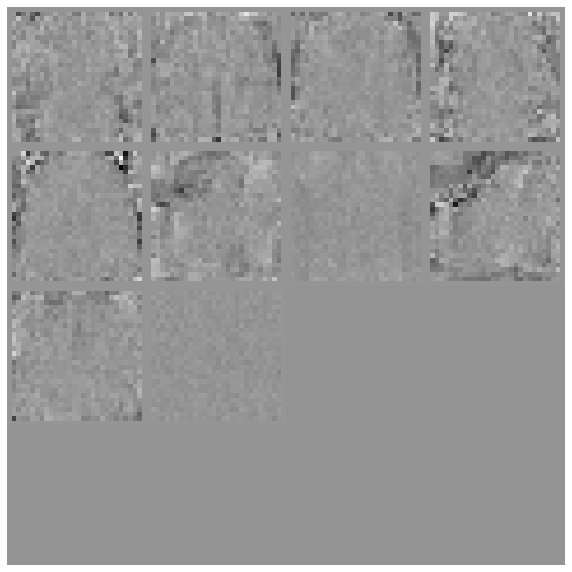

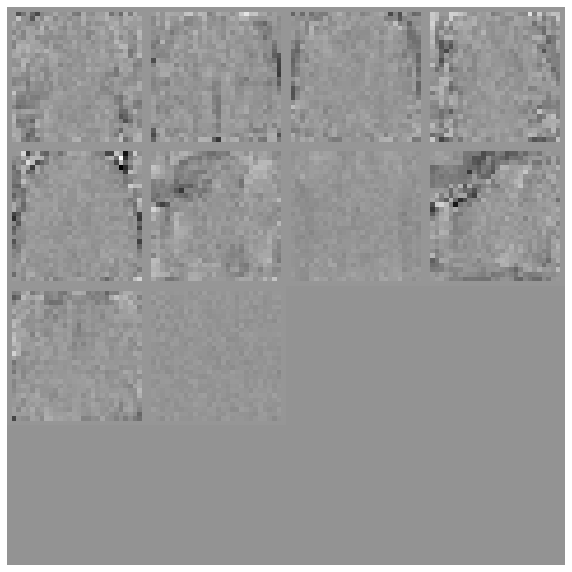

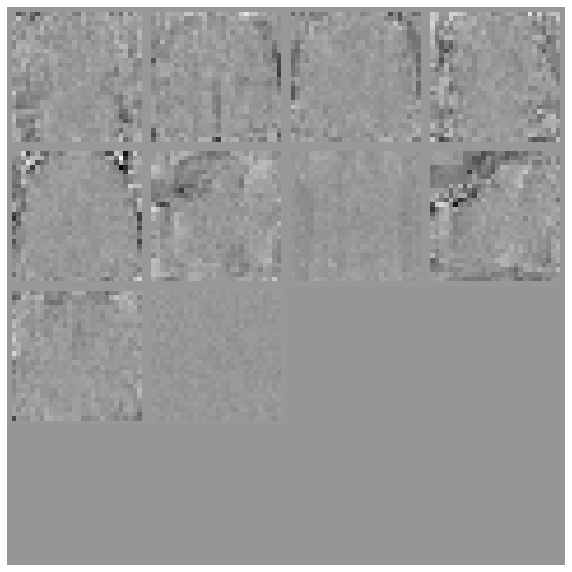

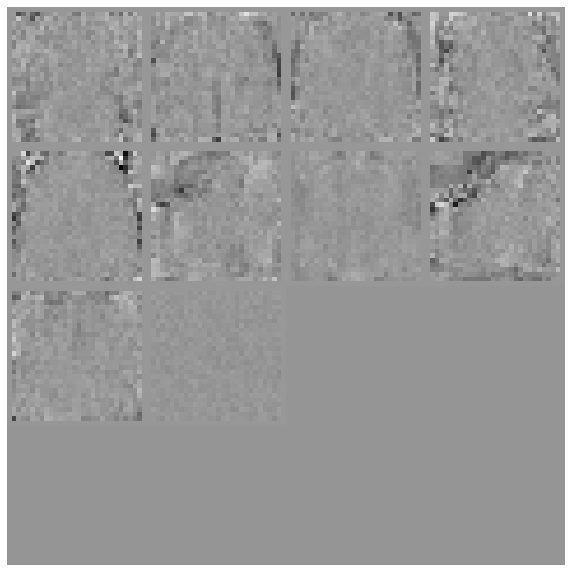

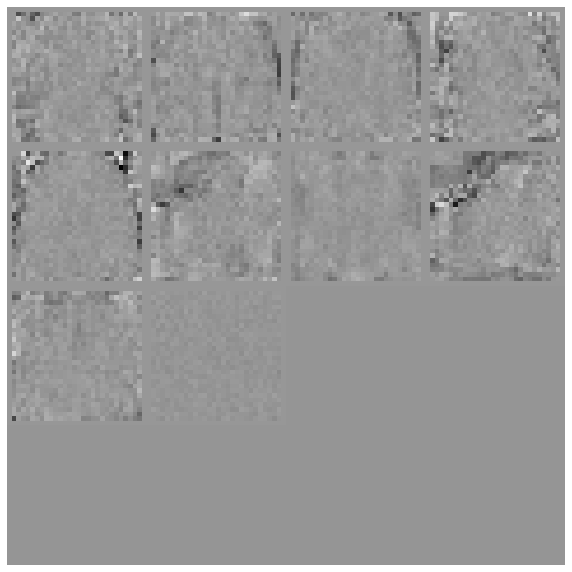

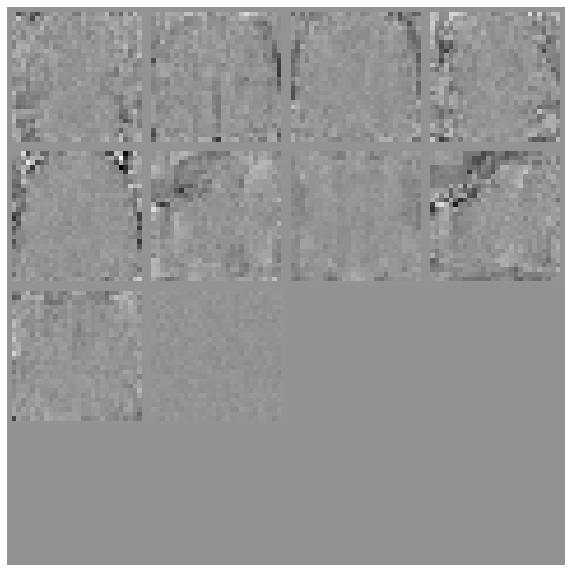

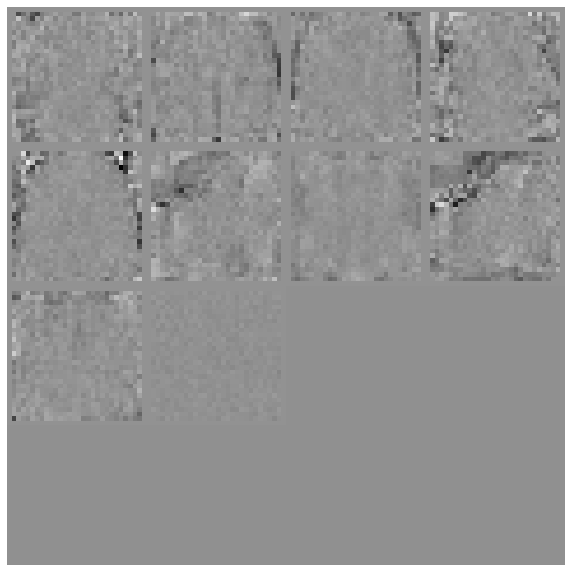

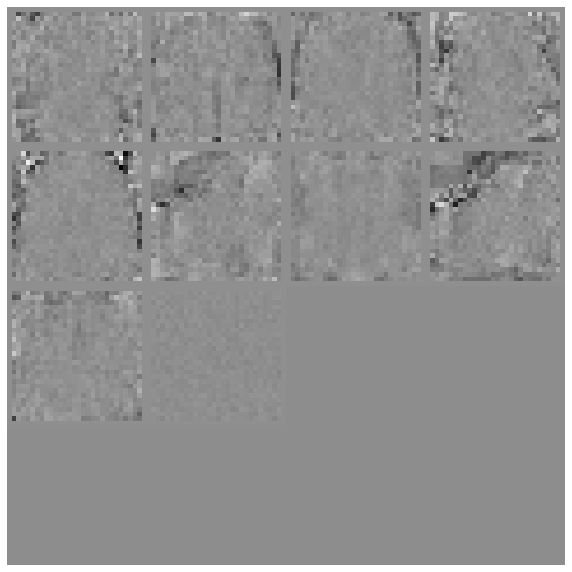

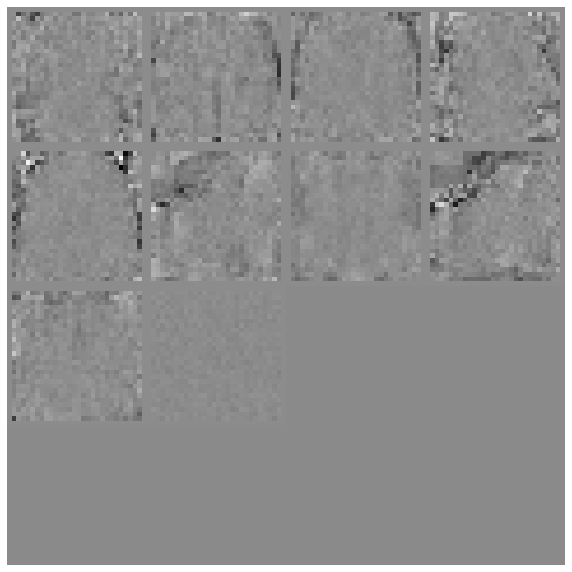

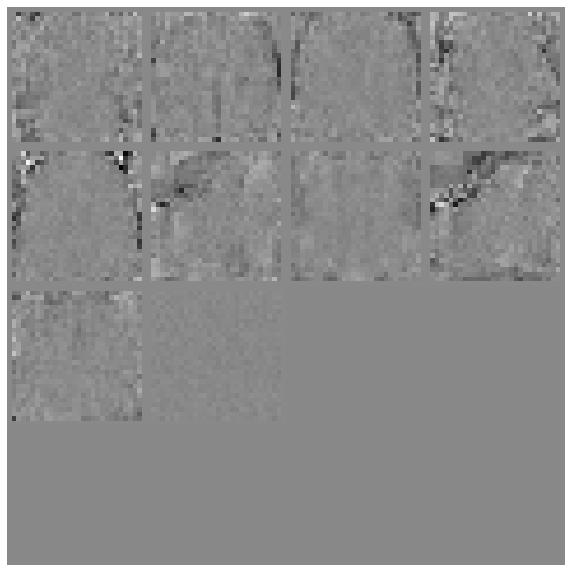

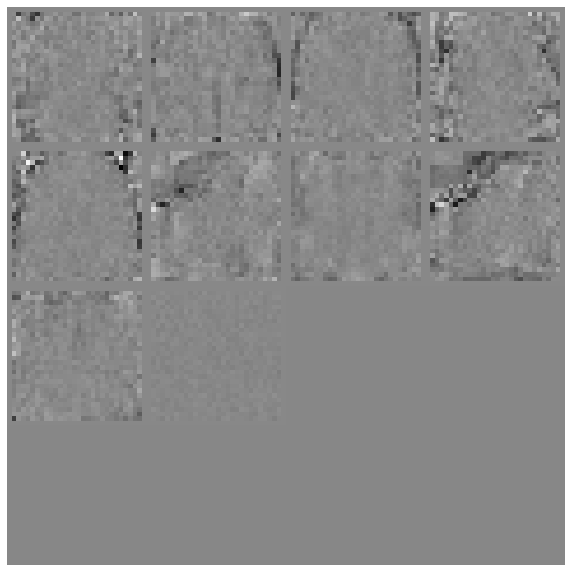

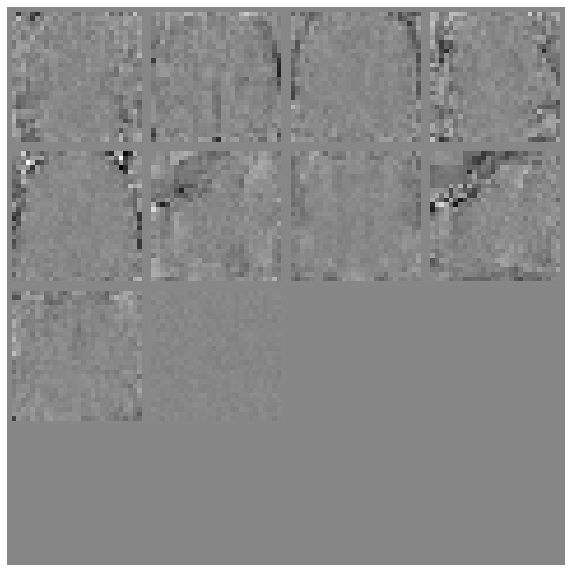

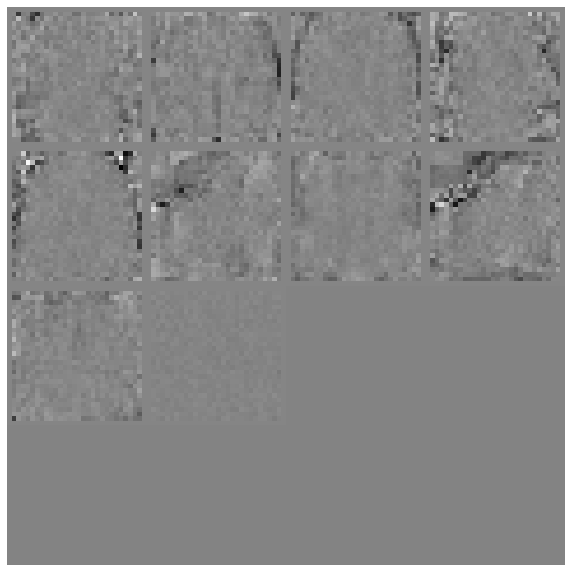

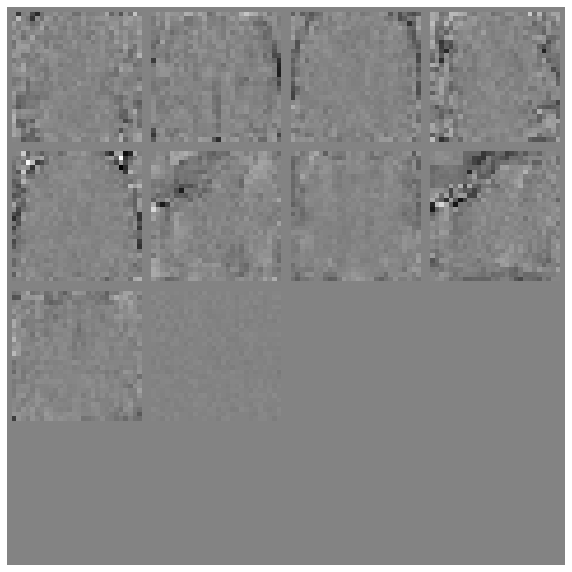

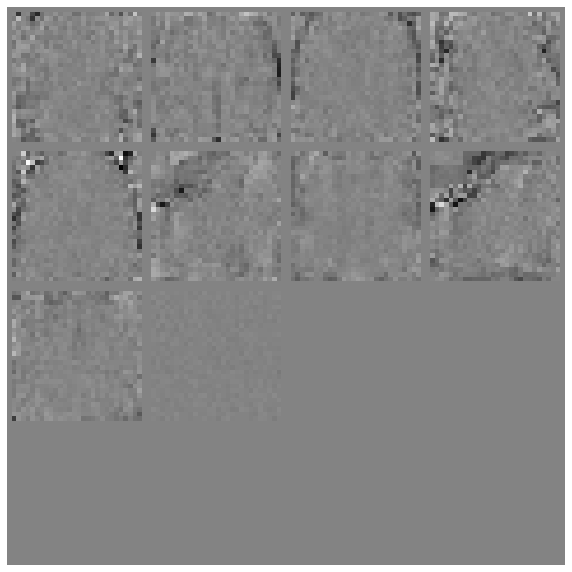

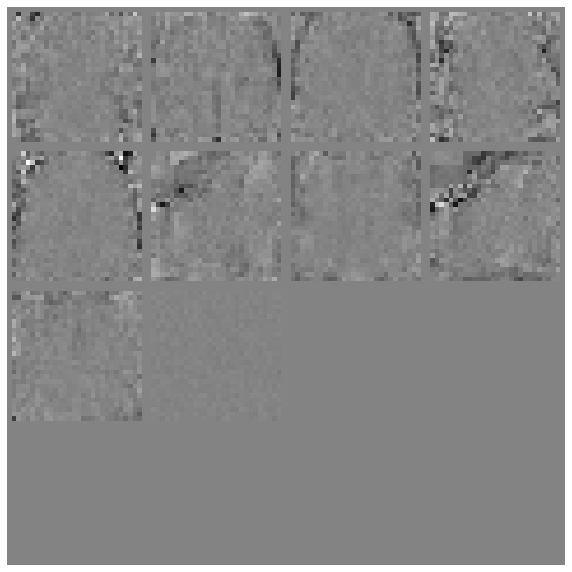

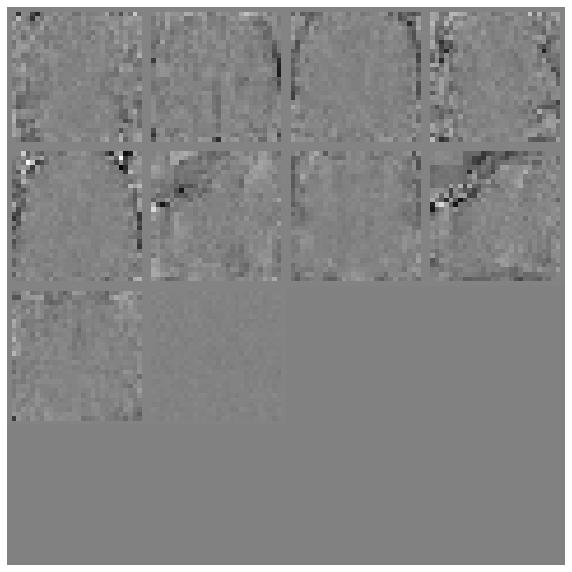

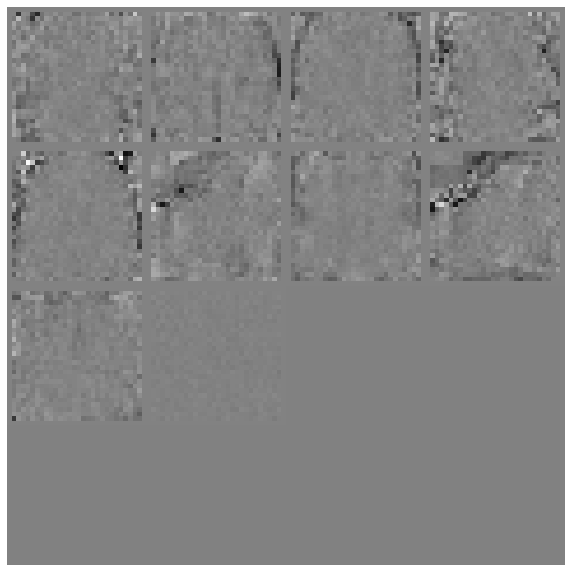

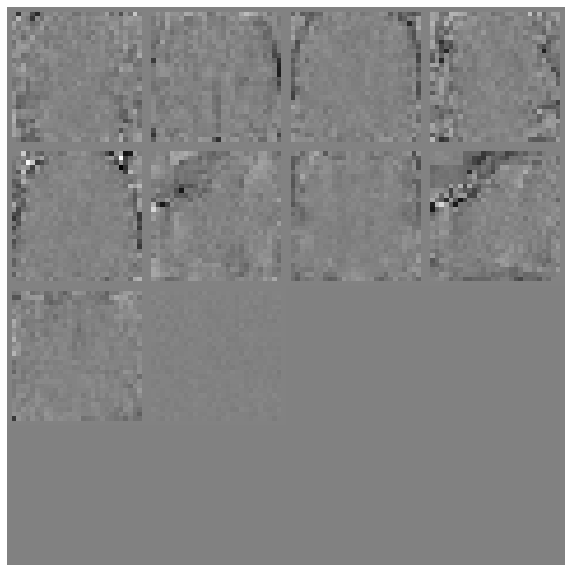

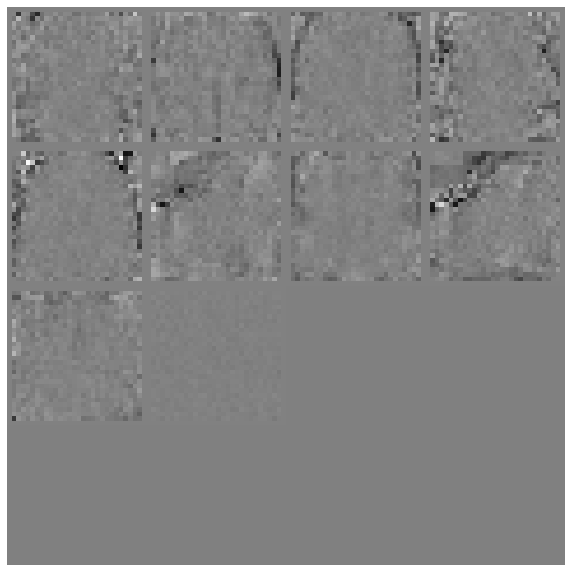

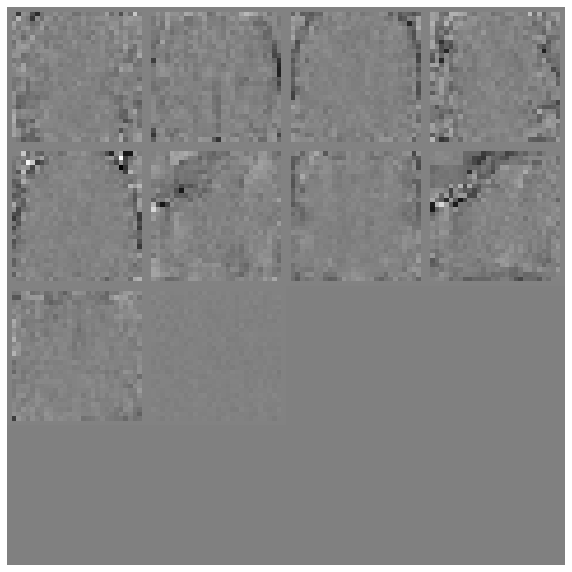

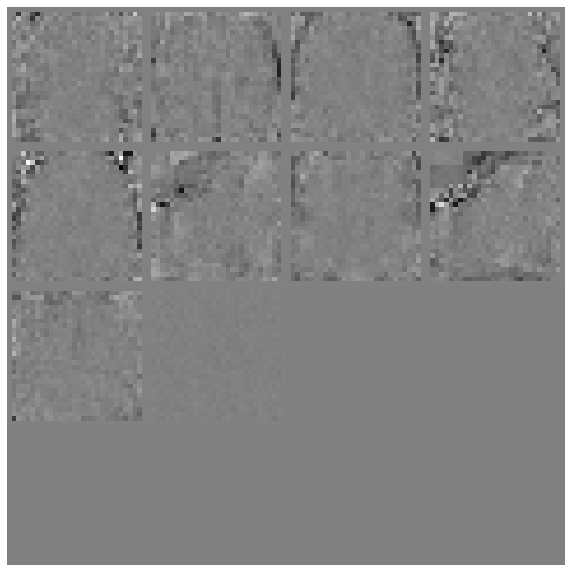

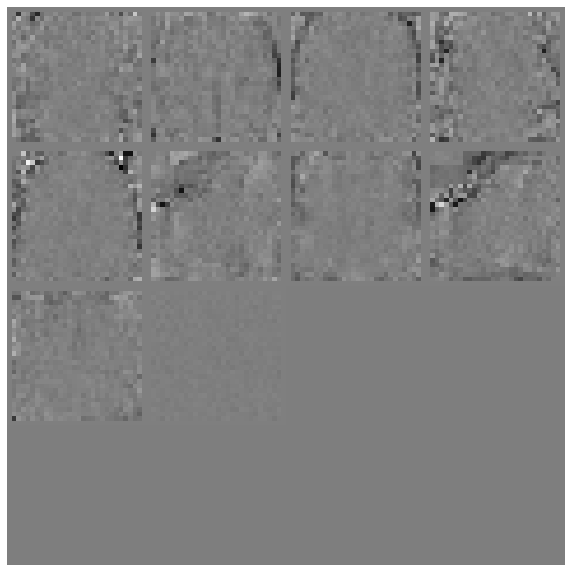

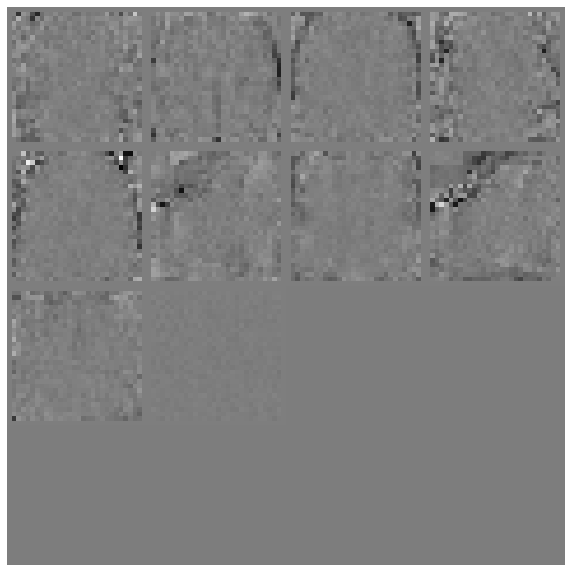

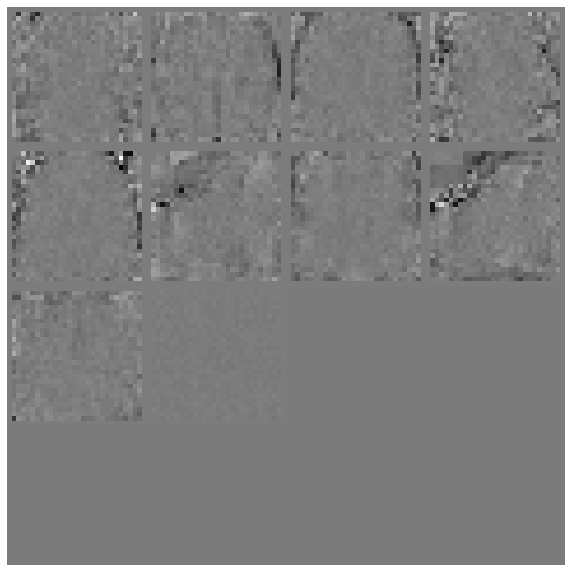

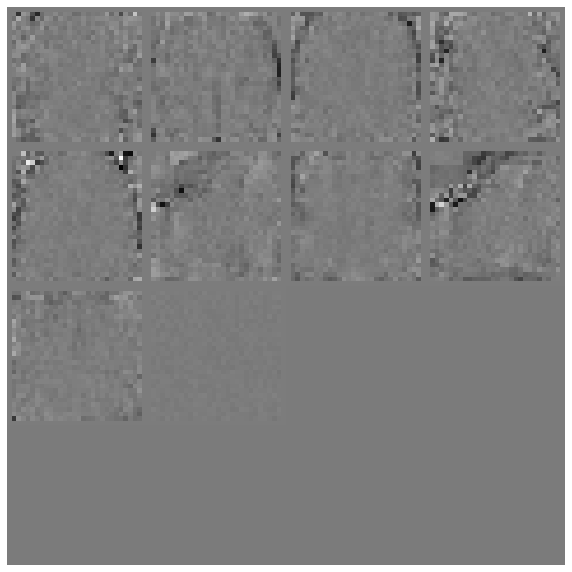

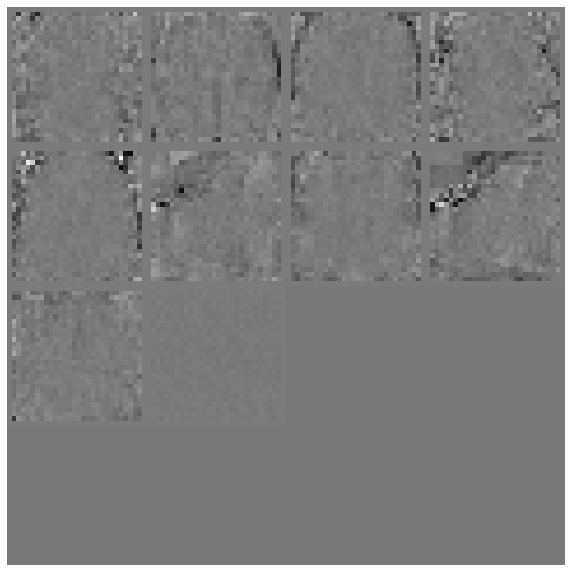

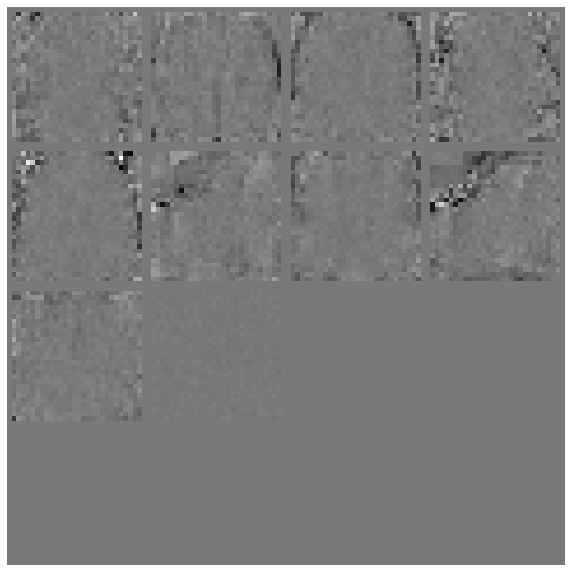

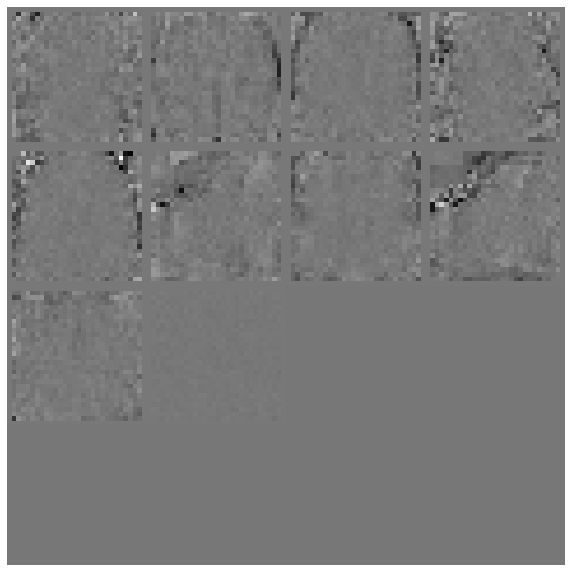

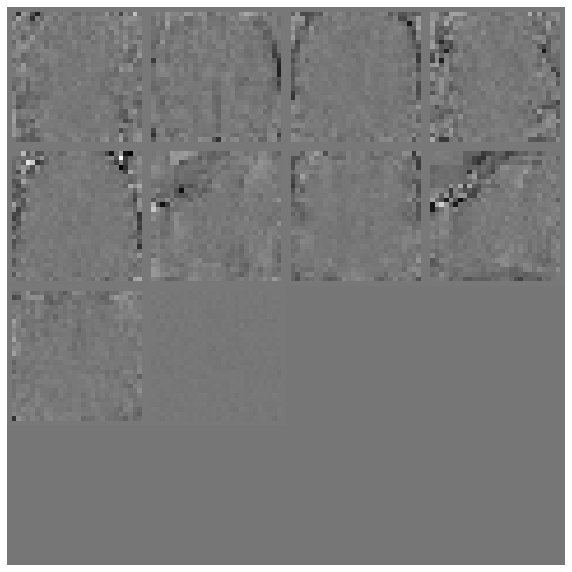

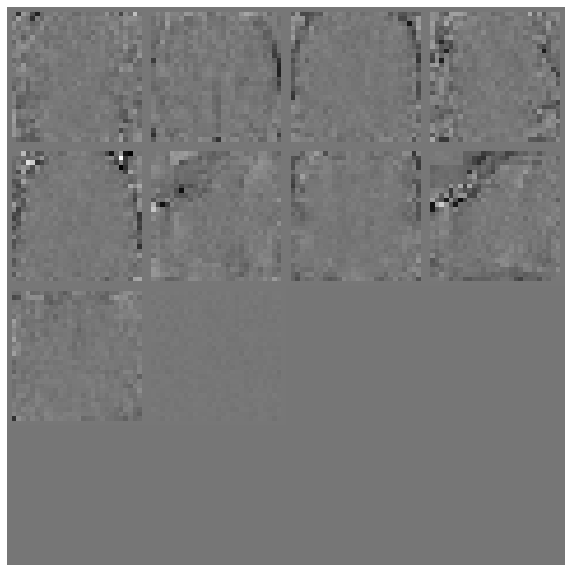

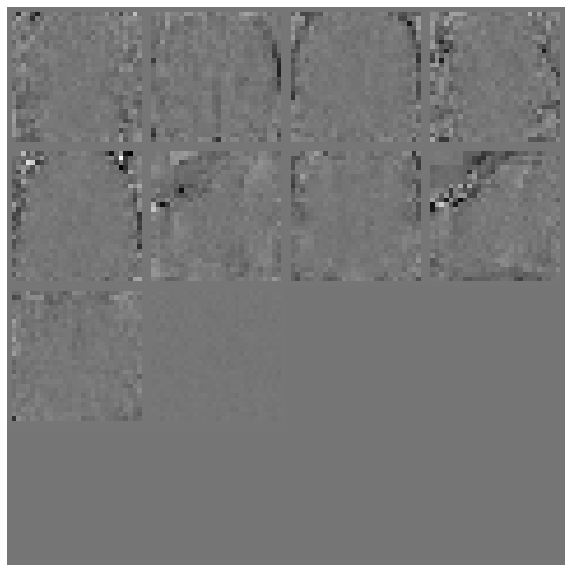

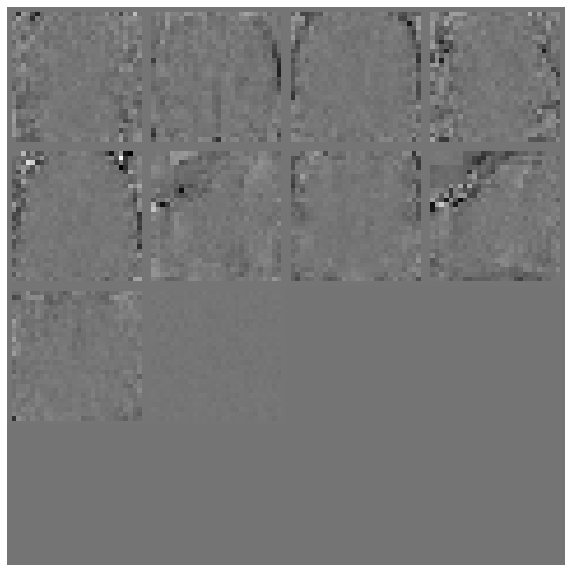

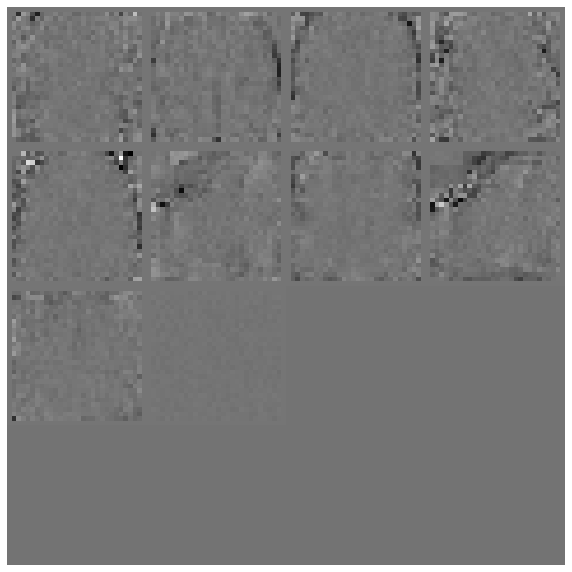

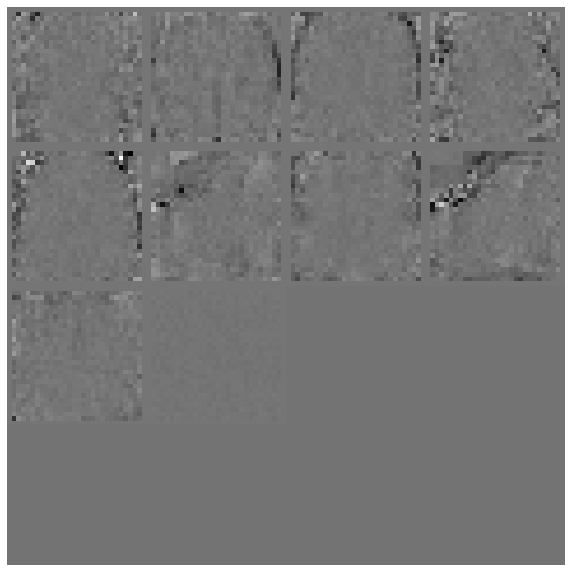

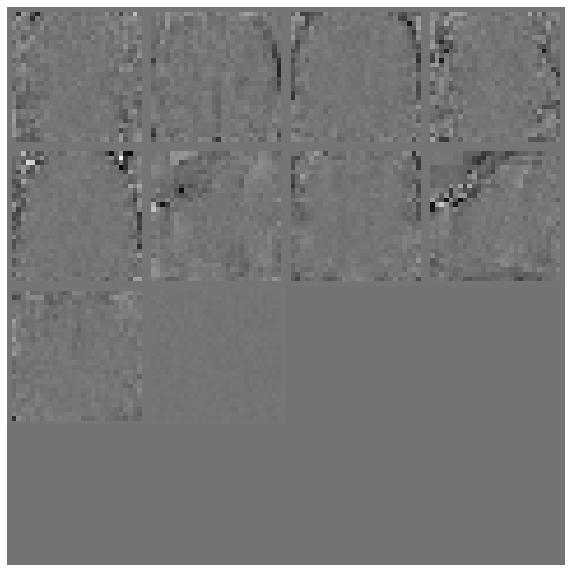

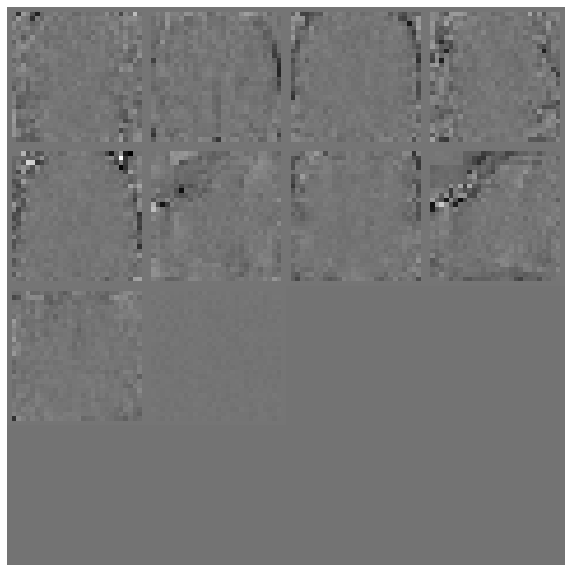

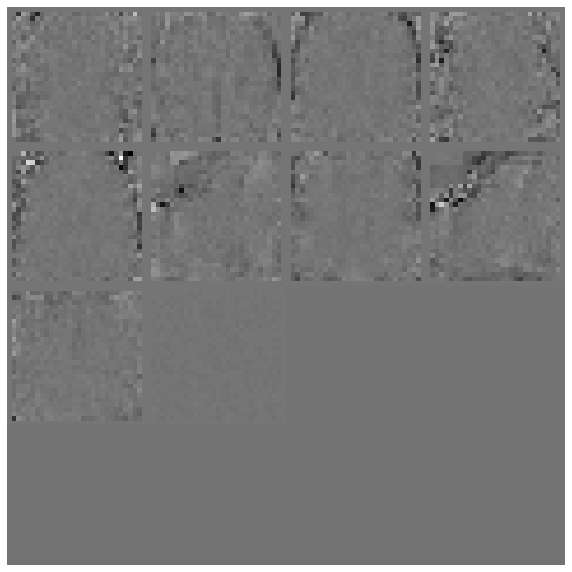

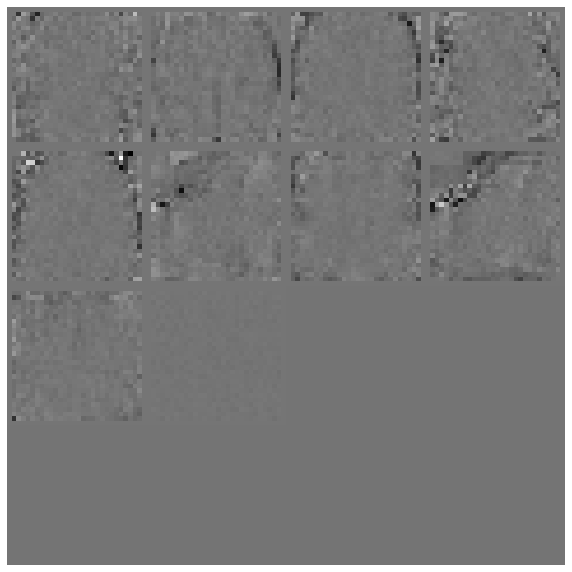

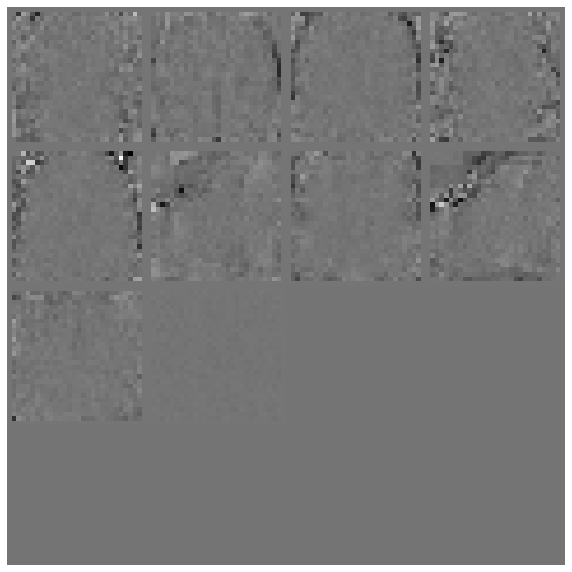

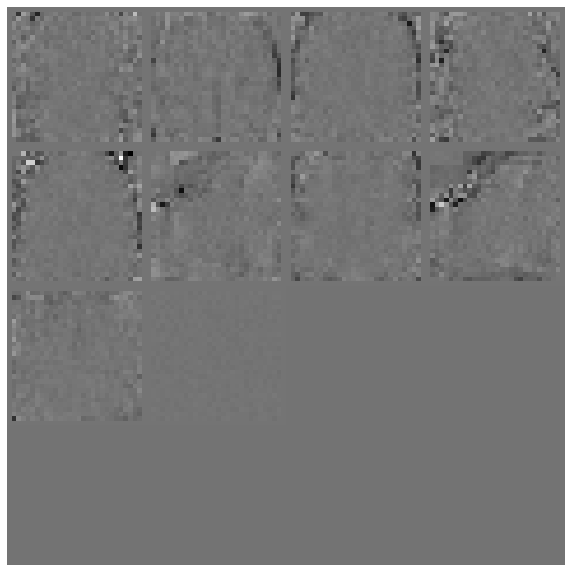

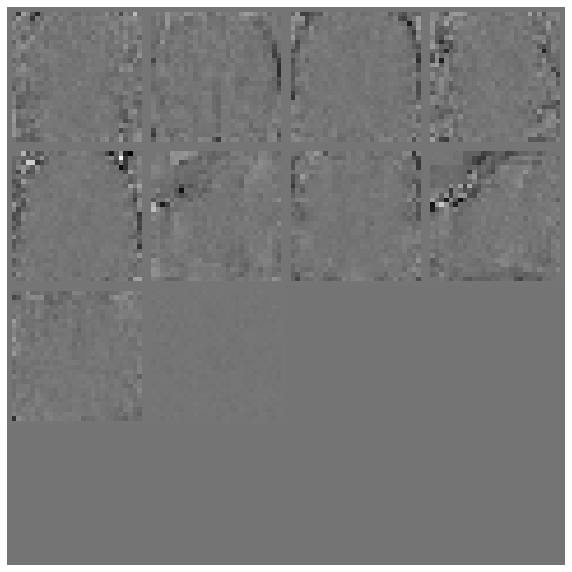

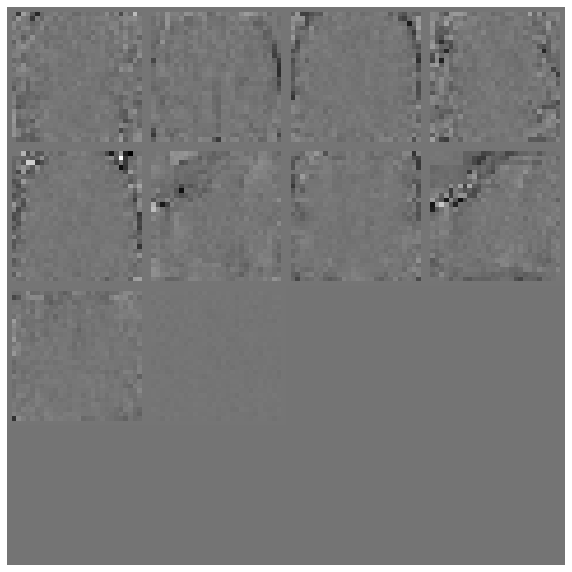

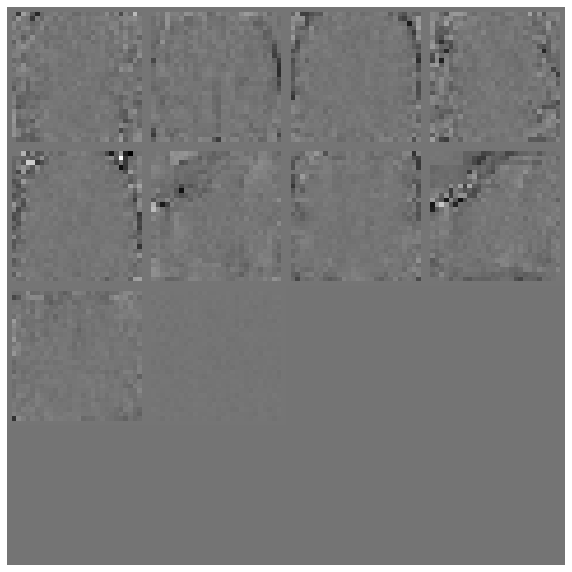

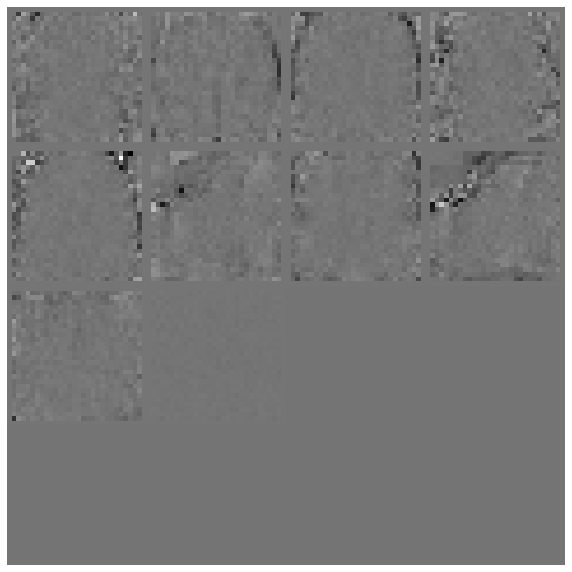

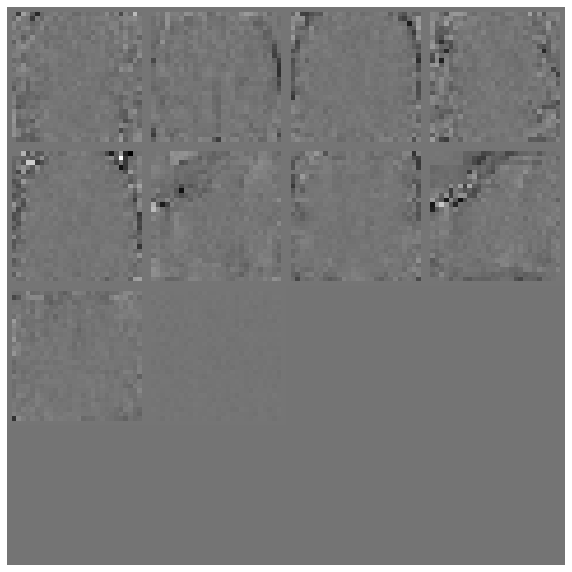

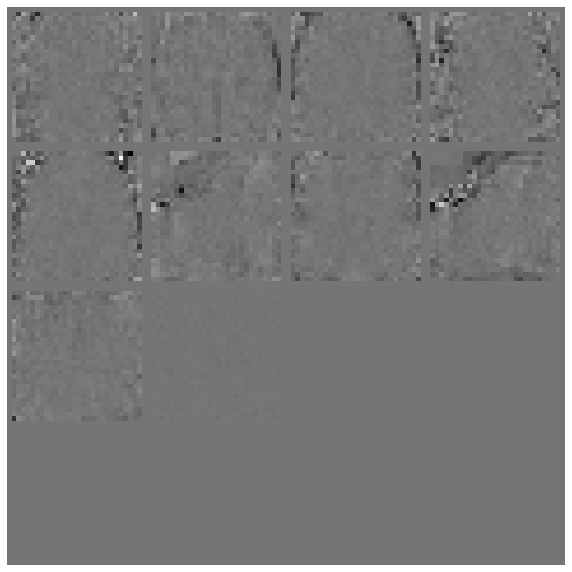

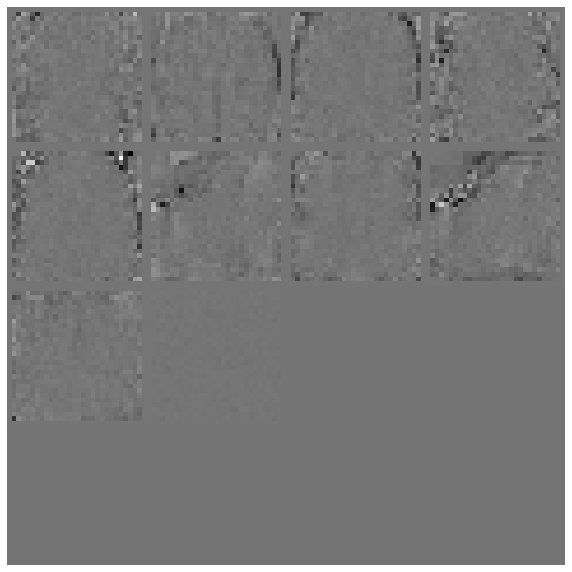

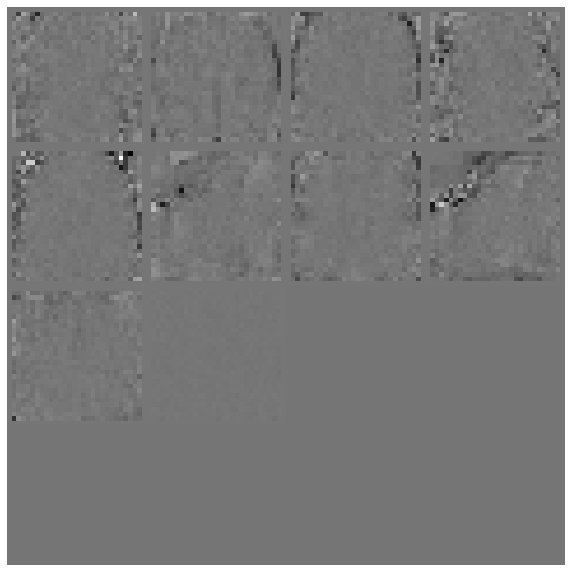

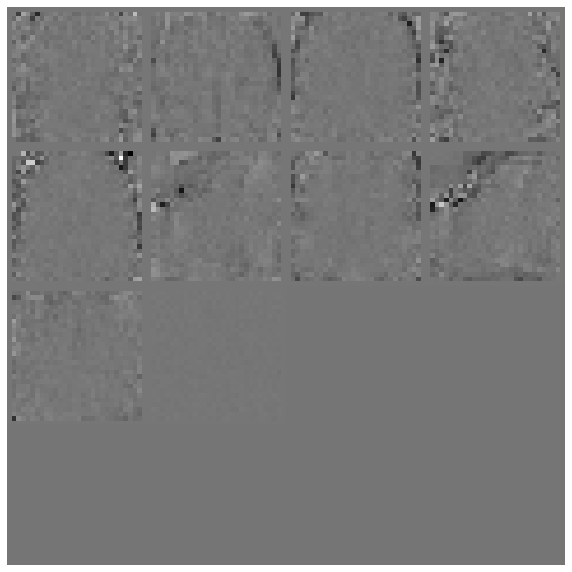

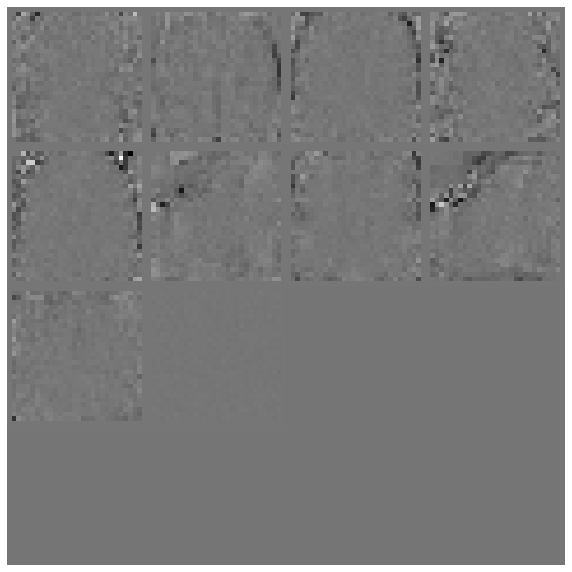

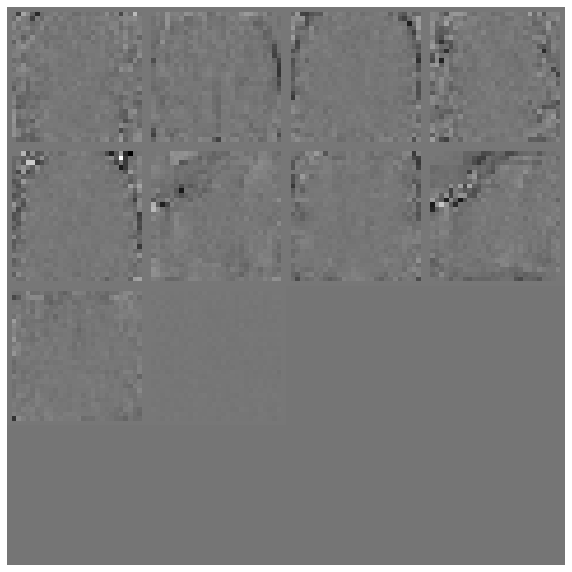

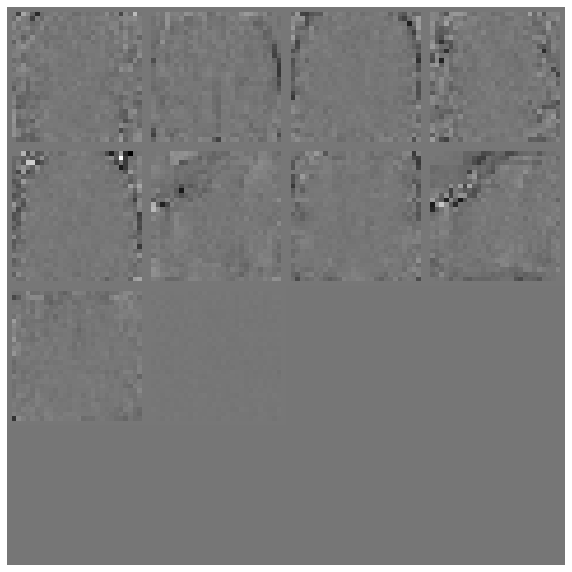

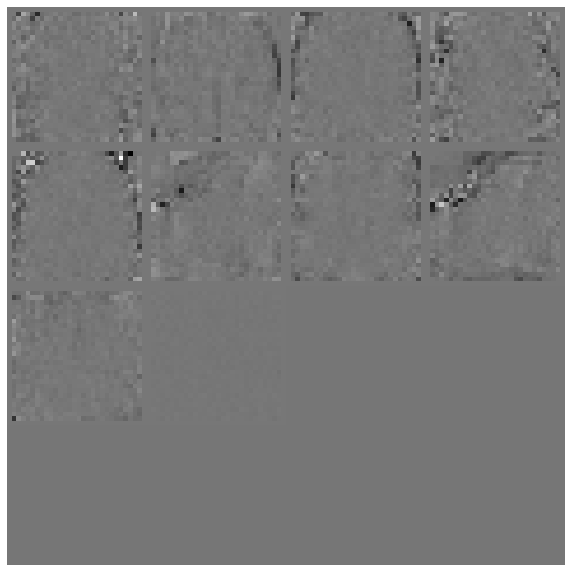

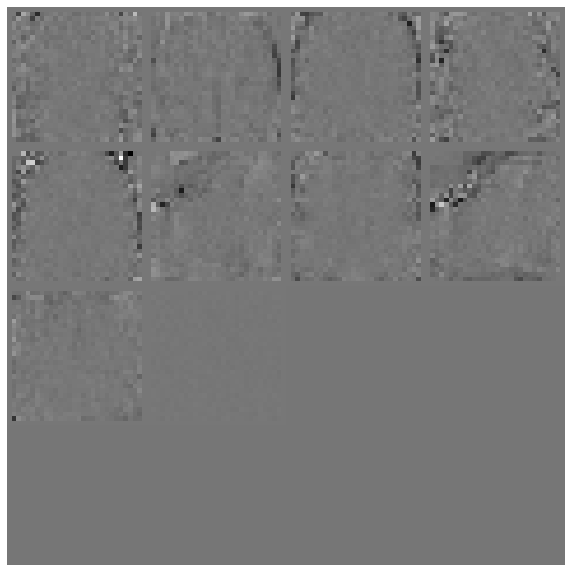

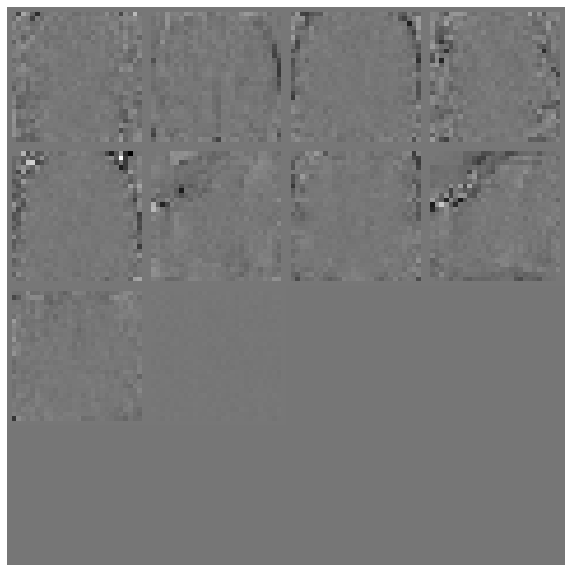

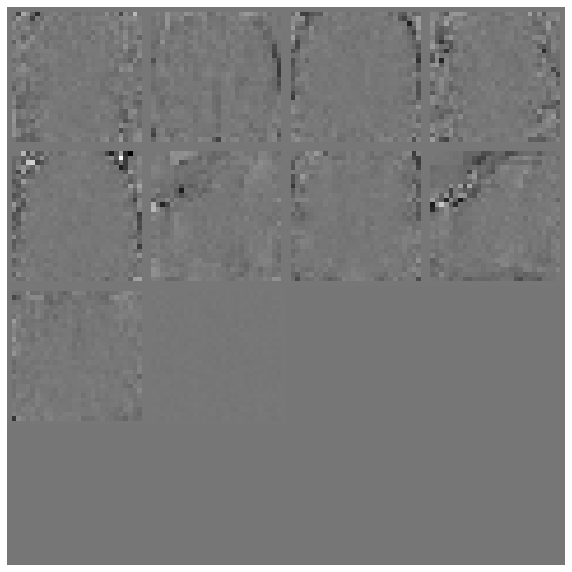

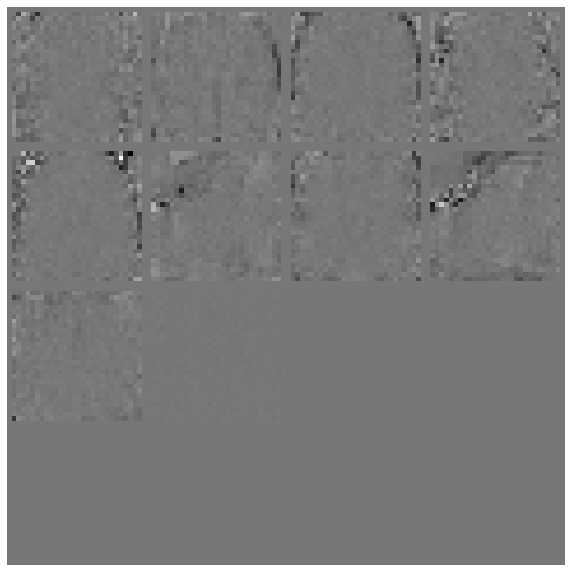

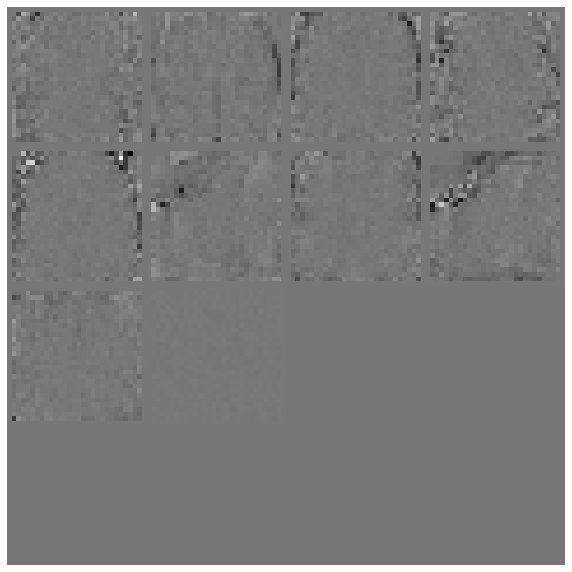

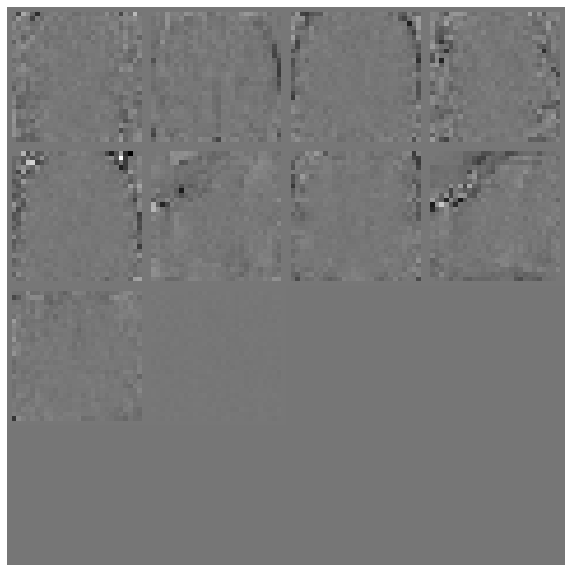

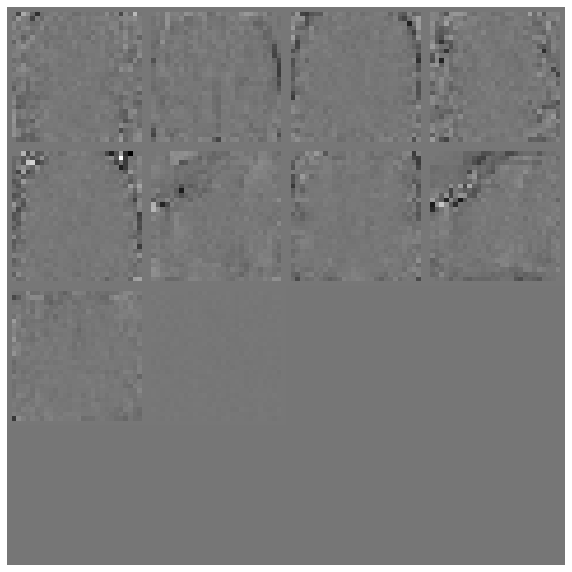

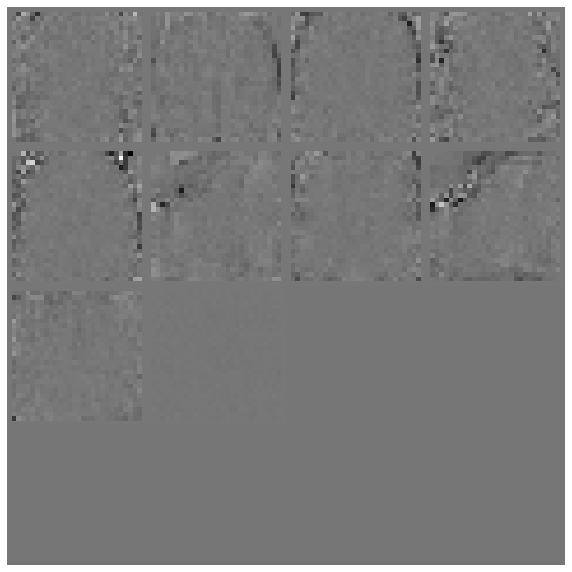

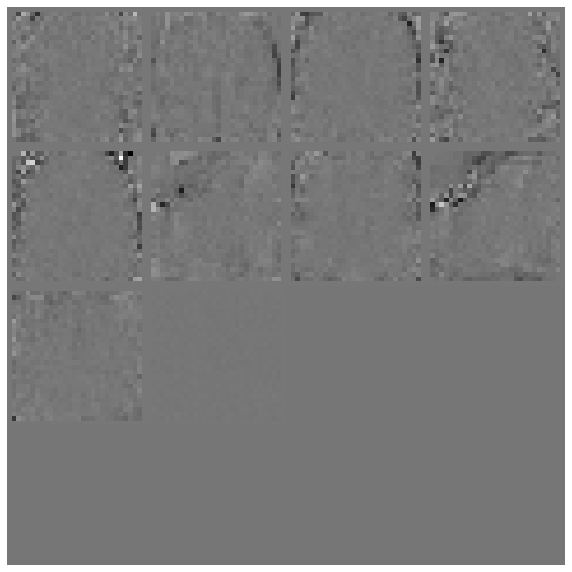

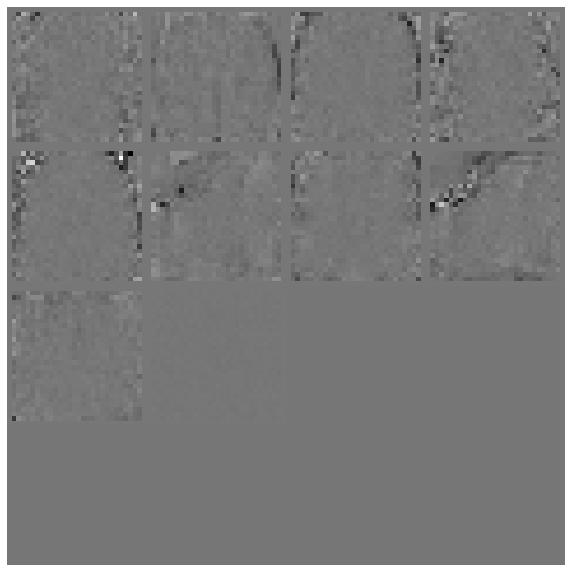

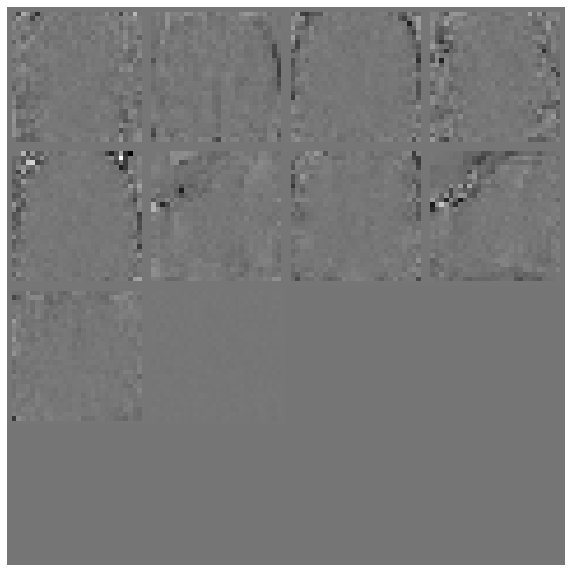

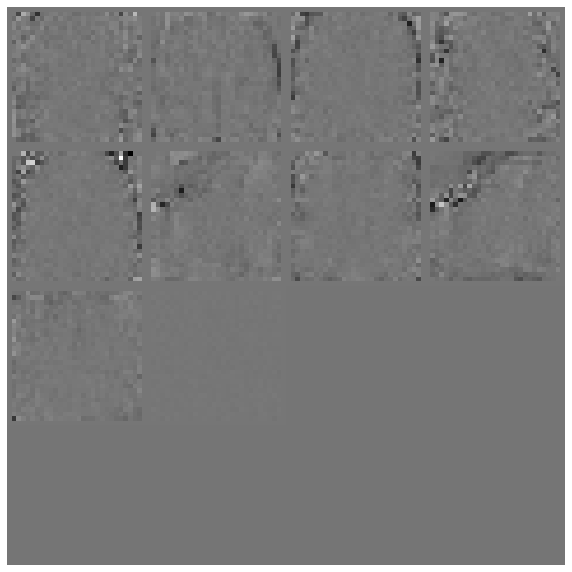

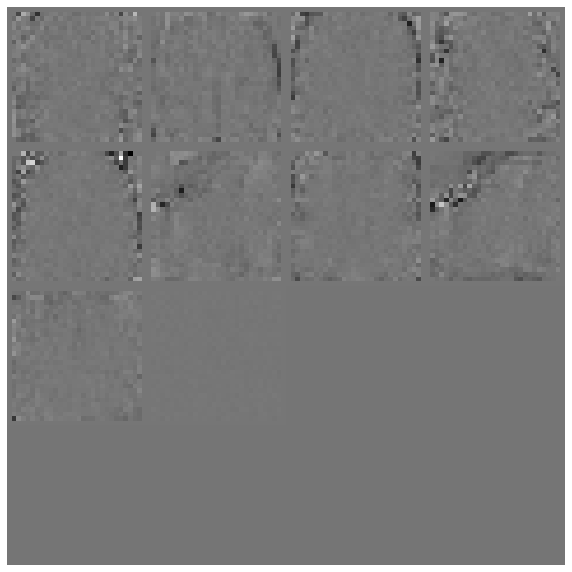

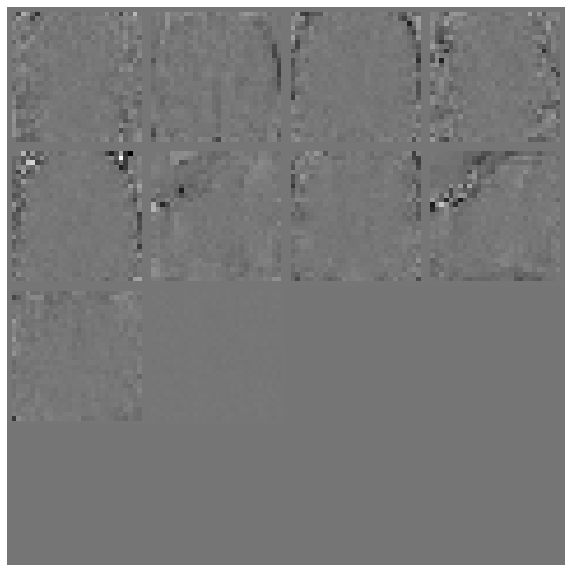

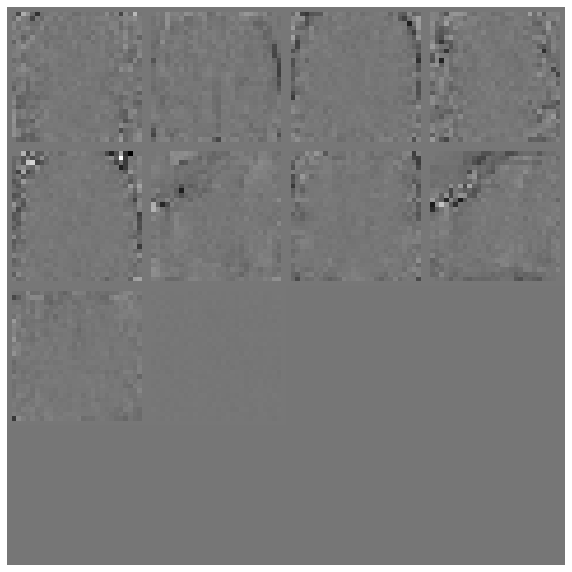

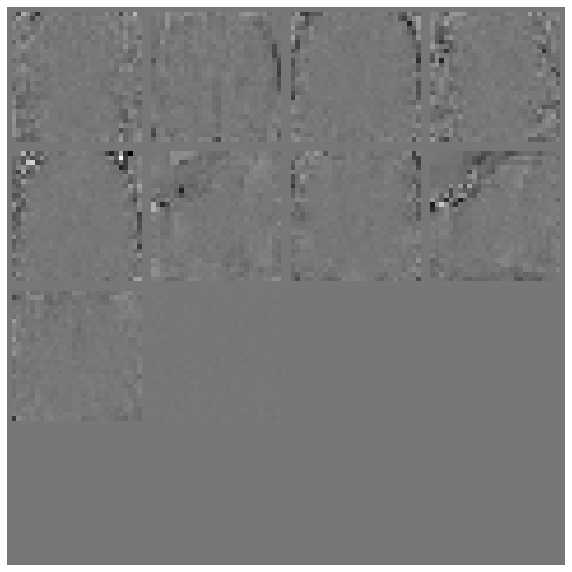

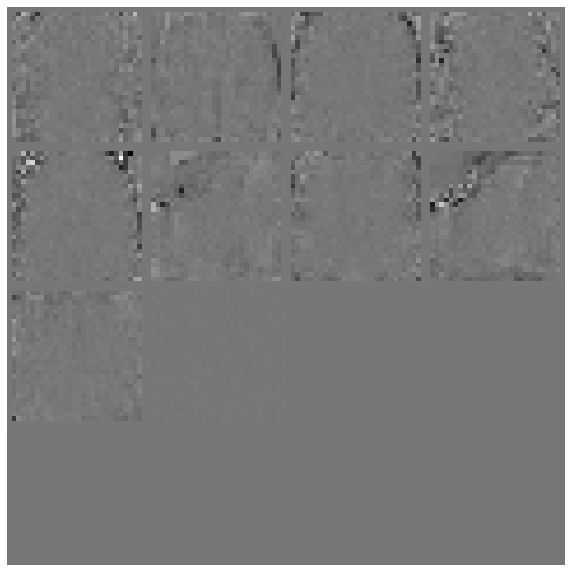

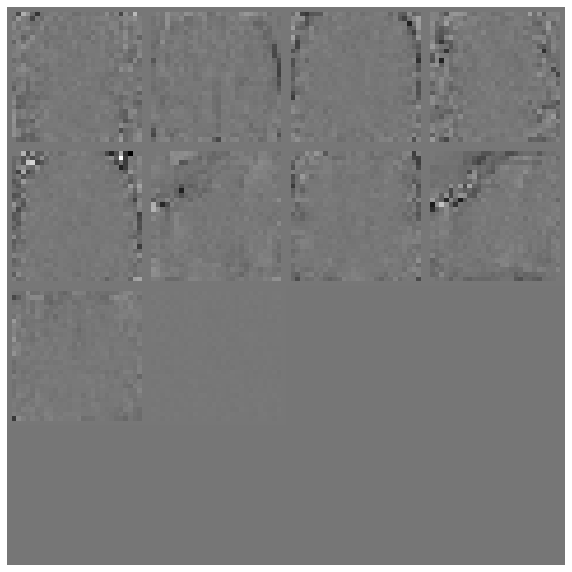

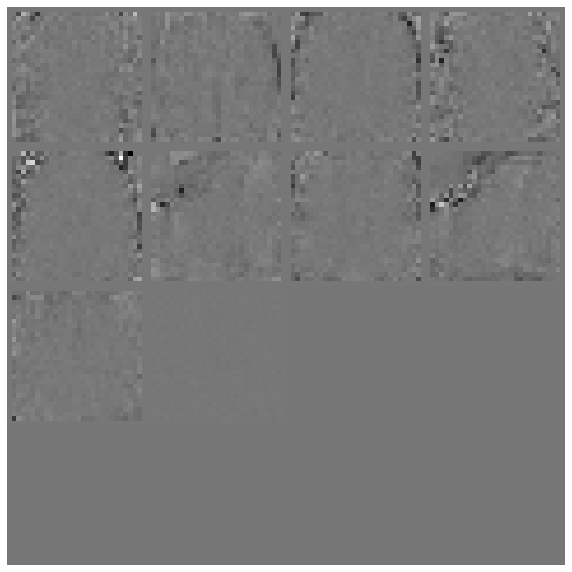

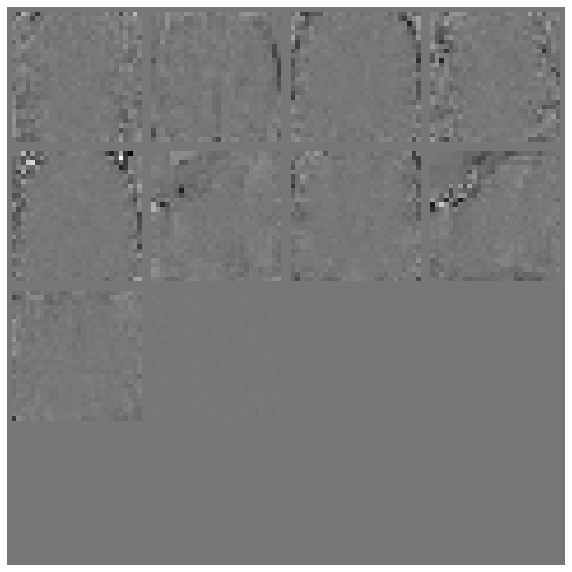

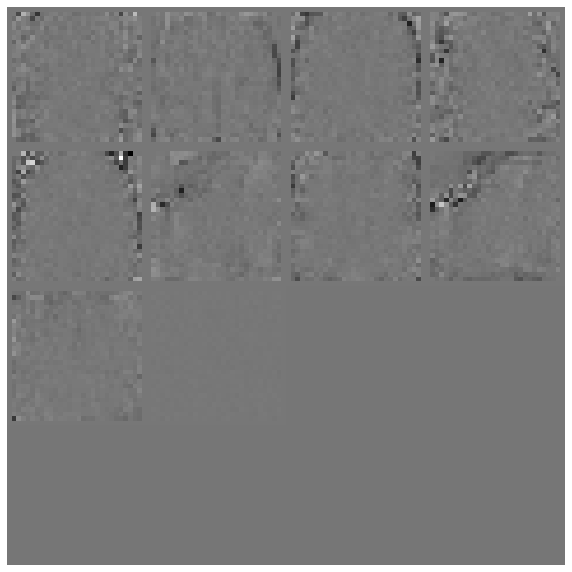

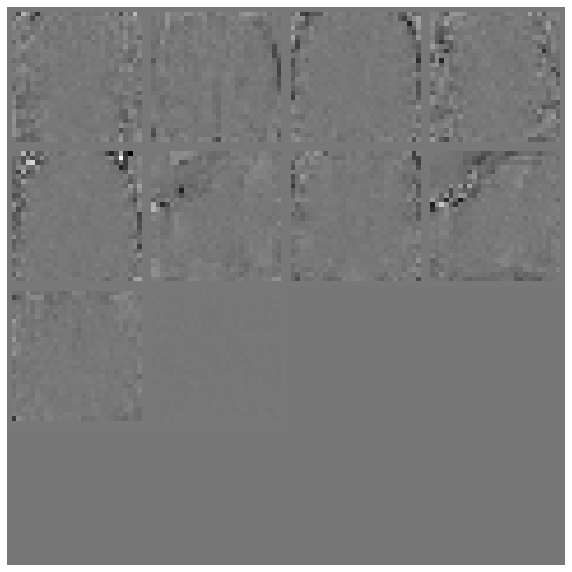

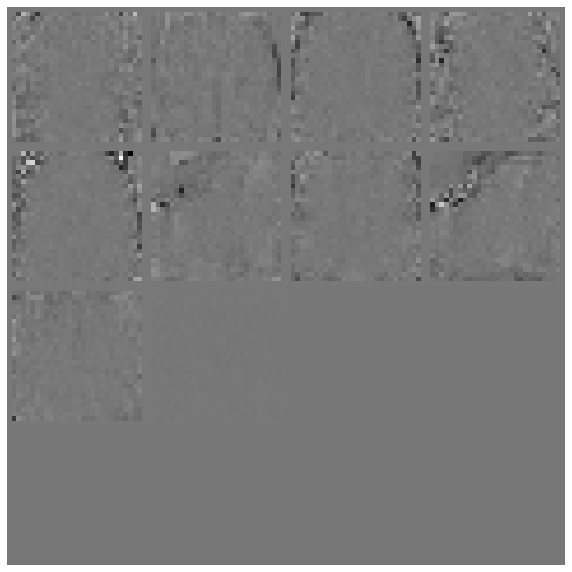

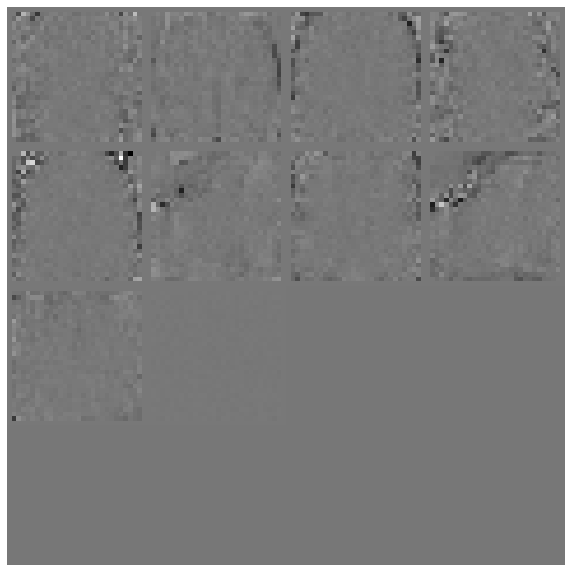

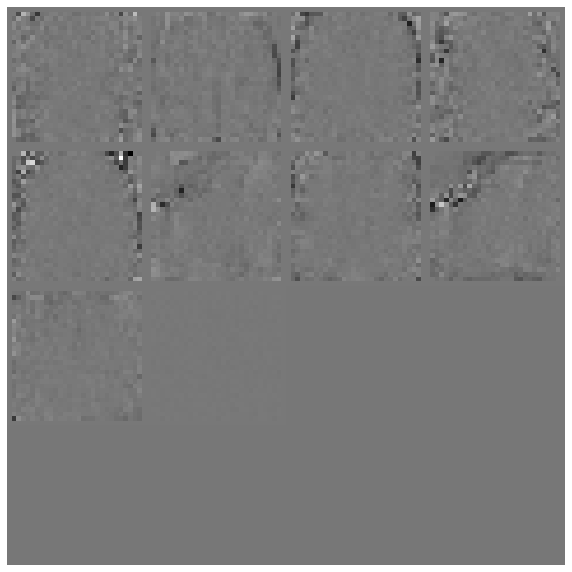

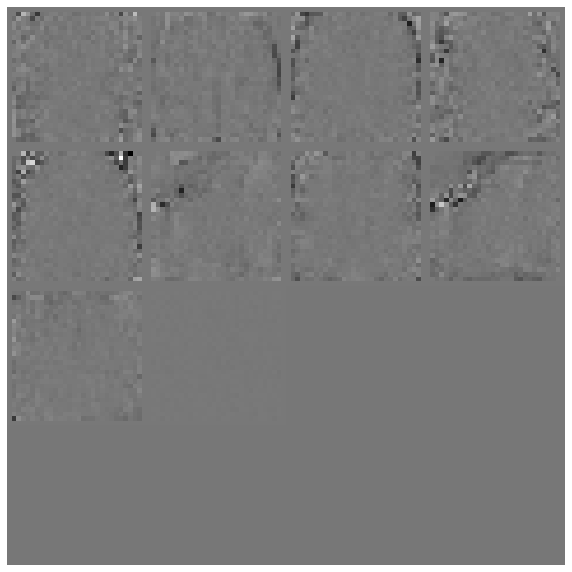

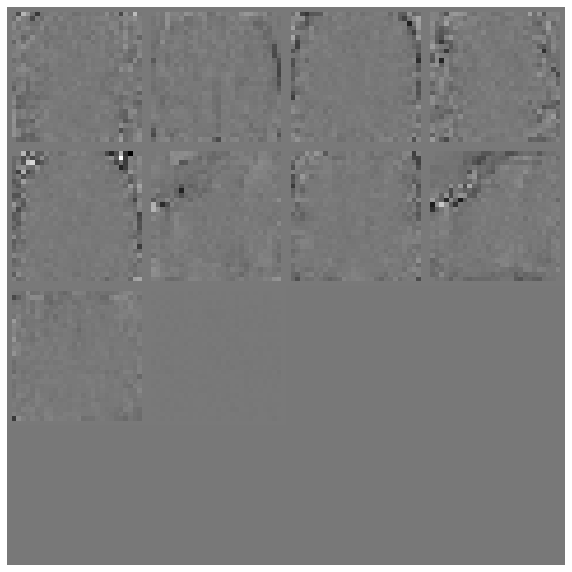

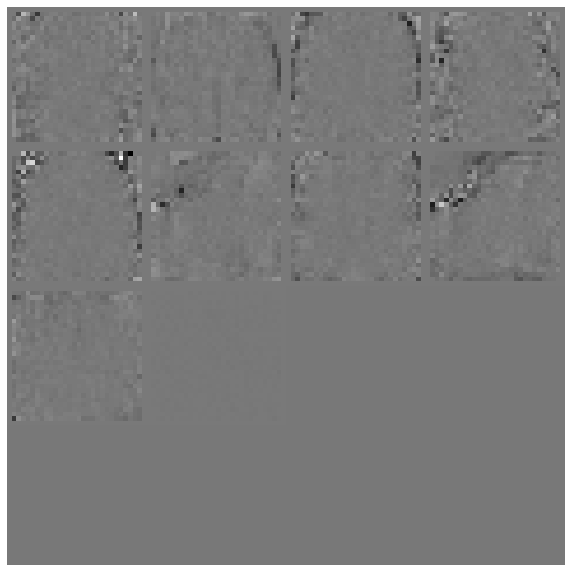

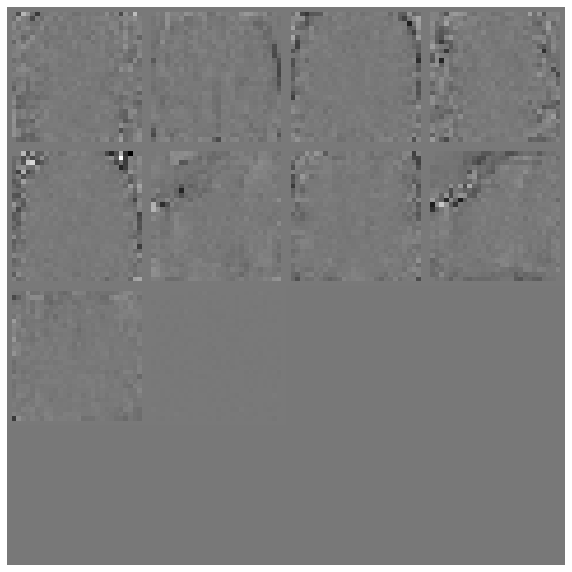

In [106]:
wb.init(project="Simple_Linear_Adam_KMNIST"); #makes a chart for us and how well is out classification happening
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000 #how many times we run it

w = [GPU(Truncated_Normal((784,10)))] #starts our model randomly

optimizer = torch.optim.Adam(w, lr=c.h)  #update w 

for i in range(c.epochs):

    x,y = get_batch('train') #gets a small batch of the data

    loss = cross_entropy(softmax(model(x,w)),y) #softmax makes sure everything adds up

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #use the loss function to update w 
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing